In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Import packages
import matplotlib.pyplot as plt


/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

# Compute the PCA of the latent space

(101, 103, 25, 8)
(101, 103, 25, 2)
Explained variance ratio: [8.30841312e-01 1.67423504e-01 1.56184628e-03 1.73337065e-04
 1.05330415e-11]


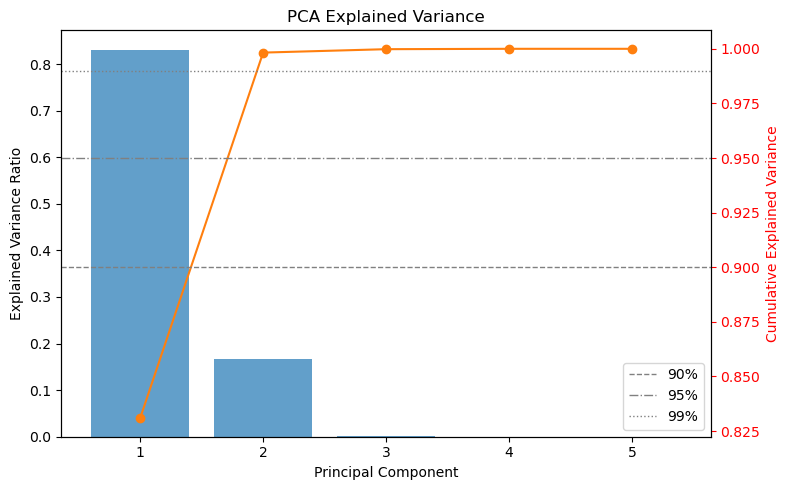

In [2]:
from sklearn.decomposition import PCA

data = np.load('../data_latent.npy')
print(data.shape)

H = data[:,:,:,3::]
xx =  data[:,:,:,0]
tt =  data[:,:,:,1]
nunu =  data[:,:,:,2]
print(data[:,:,:,(1,2)].shape)
# Reshape H to 2D: (num_samples, num_features)
H_reshaped = H.reshape(-1, H.shape[-1])
# Fit PCA
pca = PCA()
H_pca = pca.fit_transform(H_reshaped)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

fig, ax1 = plt.subplots(figsize=(8, 5))

# Histogram of explained variance ratios
ax1.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, color='C0')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')

# Cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)
ax2 = ax1.twinx()
ax2.plot(range(1, len(cum_var) + 1), cum_var, color='C1', marker='o')
ax2.set_ylabel('Cumulative Explained Variance', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', colors='red')

# Horizontal lines for 90%, 95%, 99% with legend
lines = []
labels = []
for thresh, style, label in zip([0.9, 0.95, 0.99], ['--', '-.', ':'], ['90%', '95%', '99%']):
    line = ax2.axhline(y=thresh, color='gray', linestyle=style, linewidth=1, label=label)
    lines.append(line)
    labels.append(label)

# Add legend for threshold lines
ax2.legend(lines, labels, loc='lower right')

plt.title('PCA Explained Variance')
plt.tight_layout()
plt.savefig('pca.pdf', format='pdf', bbox_inches='tight')
plt.show()


Number of components making the 95% of the PCA:  4


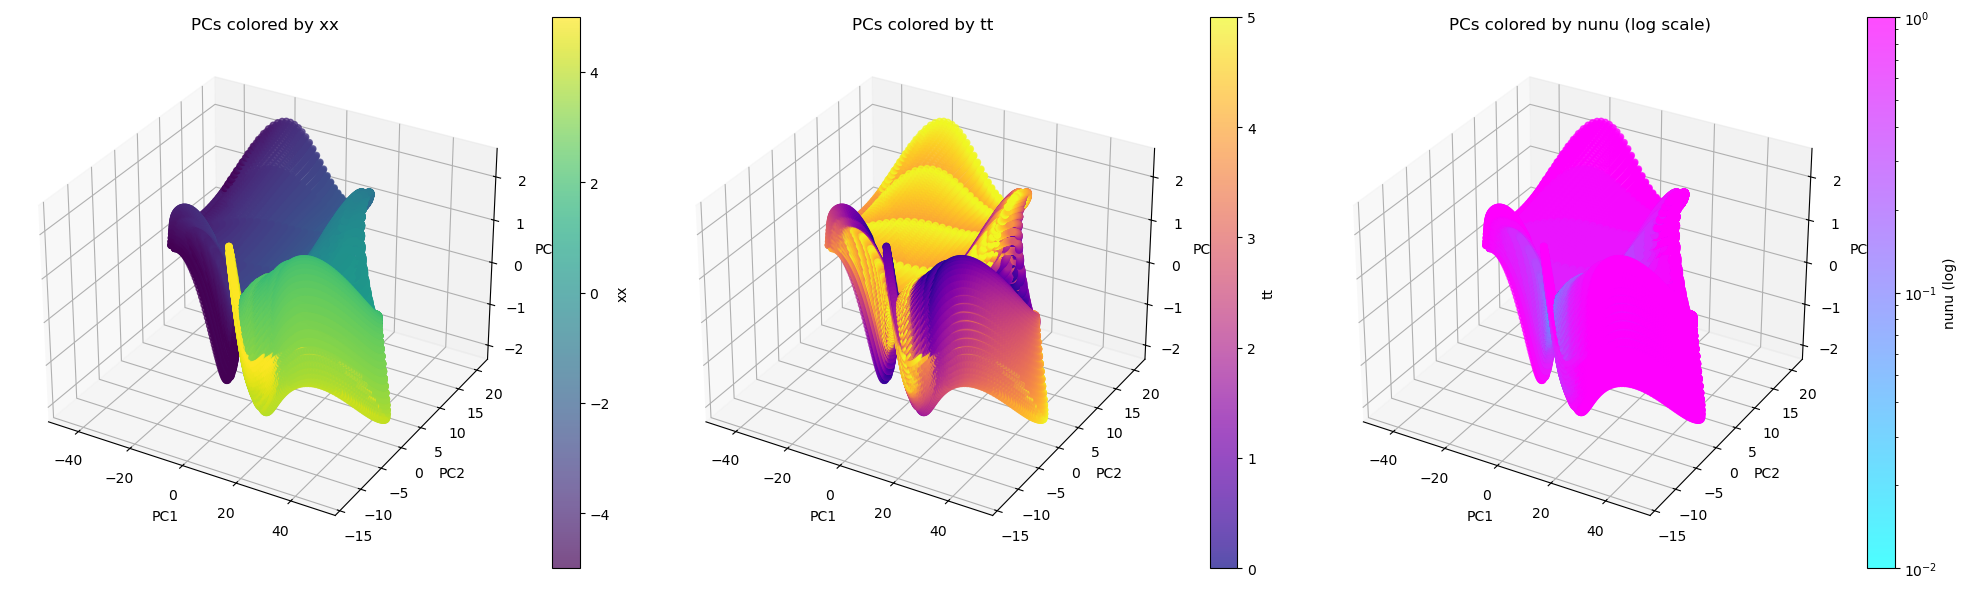

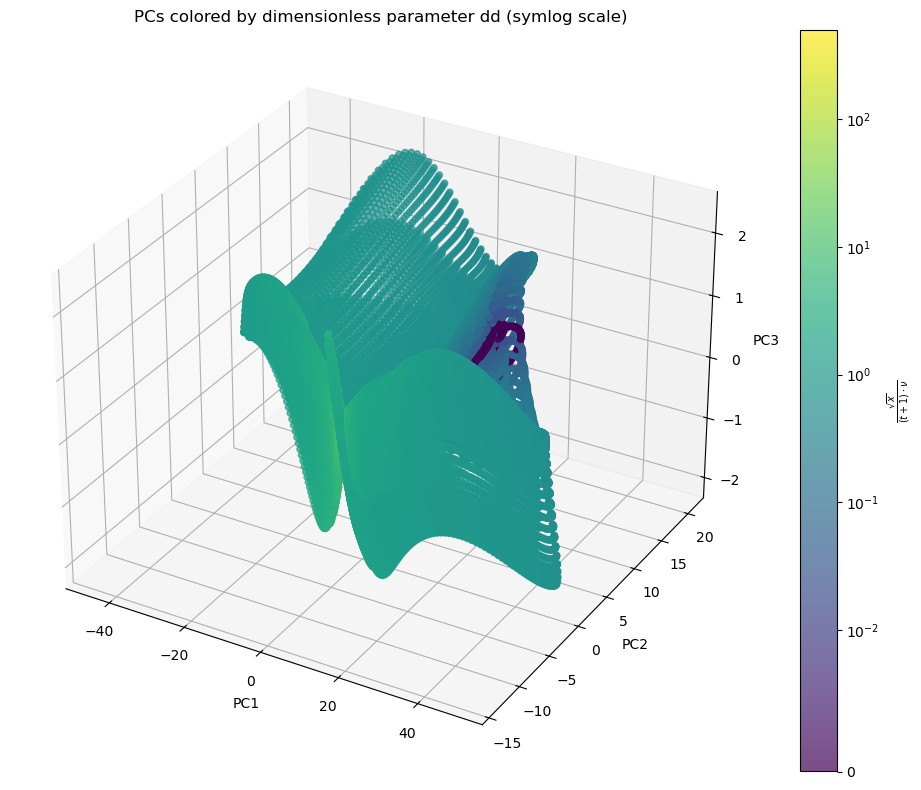

In [3]:
import matplotlib.colors as mcolors

# Find number of components to reach 95% variance
n_components_95 = np.argmax(cum_var >= 0.95) + 3
print('Number of components making the 95% of the PCA: ', n_components_95)

# Project data onto top components
H_pca_95 = H_pca[:, :n_components_95]

fig_3d, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})

# Plot colored by xx
sc0 = axes[0].scatter(H_pca_95[:, 0], H_pca_95[:, 1], H_pca_95[:, 2], c=xx, cmap='viridis', alpha=0.7)
axes[0].set_title('PCs colored by xx')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_zlabel('PC3')
fig_3d.colorbar(sc0, ax=axes[0], label='xx')

# Plot colored by tt
sc1 = axes[1].scatter(H_pca_95[:, 0], H_pca_95[:, 1], H_pca_95[:, 2], c=tt, cmap='plasma', alpha=0.7)
axes[1].set_title('PCs colored by tt')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_zlabel('PC3')
fig_3d.colorbar(sc1, ax=axes[1], label='tt')

# Plot colored by nunu (log scale)
norm_nu = mcolors.LogNorm(vmin=np.min(nunu[nunu > 0]), vmax=np.max(nunu))
sc2 = axes[2].scatter(H_pca_95[:, 0], H_pca_95[:, 1], H_pca_95[:, 2], c=nunu, cmap='cool', norm=norm_nu, alpha=0.7)
axes[2].set_title('PCs colored by nunu (log scale)')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].set_zlabel('PC3')
fig_3d.colorbar(sc2, ax=axes[2], label='nunu (log)')

plt.tight_layout()
# save figure in pdf #
plt.savefig('pca_3d_plots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('pca_3d_plots.png', format='png', bbox_inches='tight')
plt.show()

# Compute the dimensionless quantity governing the equation #
dd_parameter = np.sqrt(xx**2)/((tt+1) * nunu)
dd_flat = dd_parameter.flatten()

# Do a 3D plot using dd_parameter as color coding with log scale, preserving sign and avoiding zeros
dd_flat_nonzero = dd_flat[dd_flat != 0]
# Use a symmetric log normalization for color scale
norm_dd = mcolors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=dd_flat_nonzero.min(), vmax=dd_flat_nonzero.max(), base=10)

fig_3d_dd, ax_dd = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 8))
sc_dd = ax_dd.scatter(H_pca_95[:, 0], H_pca_95[:, 1], H_pca_95[:, 2], c=dd_flat, cmap='viridis', norm=norm_dd, alpha=0.7)
ax_dd.set_title('PCs colored by dimensionless parameter dd (symlog scale)')
ax_dd.set_xlabel('PC1')
ax_dd.set_ylabel('PC2')
ax_dd.set_zlabel('PC3')
fig_3d_dd.colorbar(sc_dd, ax=ax_dd, label='$\\frac{\sqrt{x}}{(t+1) \cdot \\nu}$')
plt.tight_layout()
plt.show()

Creating animation with 25 frames...
Saving animation as GIF (this may take a while)...


Animation saved as 'pca_viscosity_animation.gif'


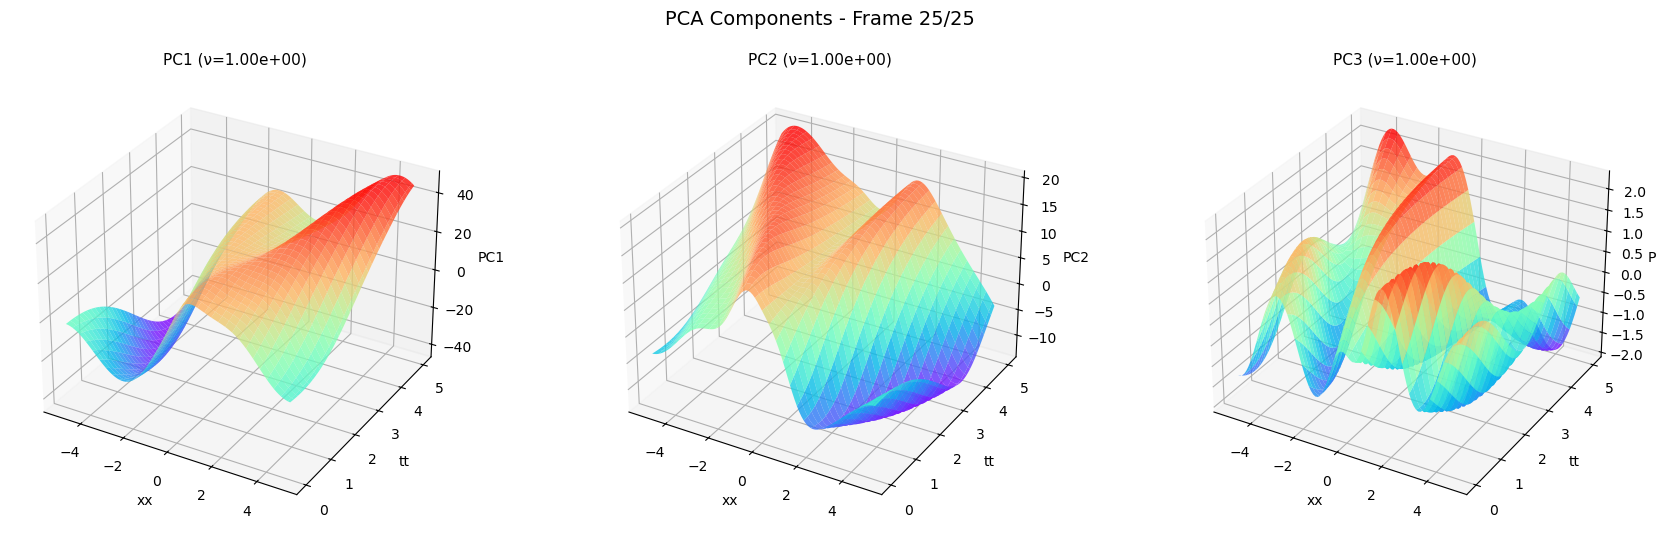

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Reshape components
H_r_1 = H_pca_95[:, 0].reshape(xx.shape)
H_r_2 = H_pca_95[:, 1].reshape(xx.shape)
H_r_3 = H_pca_95[:, 2].reshape(xx.shape)

# Get the number of viscosity levels
n_viscosity = xx.shape[2]

# Create figure and 3D subplots
fig = plt.figure(figsize=(18, 6))
fig.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.08, wspace=0.3)
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

# Store components
H_components = [H_r_1, H_r_2, H_r_3]
component_names = ['PC1', 'PC2', 'PC3']

# Initialize surfaces
surfaces = []
for i, (ax, H_comp, name) in enumerate(zip(axes, H_components, component_names)):
    surf = ax.plot_surface(xx[:, :, 0], tt[:, :, 0], 
                          H_comp[:, :, 0], cmap='rainbow',
                          alpha=0.8, edgecolor='none')
    surfaces.append(surf)
    ax.set_xlabel('xx', fontsize=10)
    ax.set_ylabel('tt', fontsize=10)
    ax.set_zlabel(name, fontsize=10)
    ax.set_title(f'{name} (ν={nunu[0, 0, 0]:.2e})', fontsize=11)
    
    # Set consistent z-limits for better comparison
    ax.set_zlim(H_comp.min(), H_comp.max())

# No tight_layout since we manually adjusted spacing

# Animation update function
def update_frame(frame):
    idx = frame
    viscosity = nunu[0, 0, idx]
    
    for i, (ax, surf, H_comp, name) in enumerate(zip(axes, surfaces, H_components, component_names)):
        # Remove old surface
        surf.remove()
        
        # Plot new surface
        new_surf = ax.plot_surface(xx[:, :, idx], tt[:, :, idx], 
                                    H_comp[:, :, idx], cmap='rainbow',
                                    alpha=0.8, edgecolor='none')
        surfaces[i] = new_surf
        
        # Update title
        ax.set_title(f'{name} (ν={viscosity:.2e})', fontsize=11)
    
    # Update main title
    fig.suptitle(f'PCA Components - Frame {frame+1}/{n_viscosity}', 
                 fontsize=14, y=0.98)
    
    return surfaces

# Create animation
print(f"Creating animation with {n_viscosity} frames...")
anim = FuncAnimation(fig, update_frame, frames=n_viscosity, 
                     interval=200, blit=False, repeat=True)

# Save as GIF
print("Saving animation as GIF (this may take a while)...")
writer = PillowWriter(fps=5)  # 5 frames per second
anim.save('pca_surface_animation.gif', writer=writer, dpi=120, 
          savefig_kwargs={'bbox_inches': 'tight', 'pad_inches': 0.2})

print("Animation saved as 'pca_viscosity_animation.gif'")


plt.show()

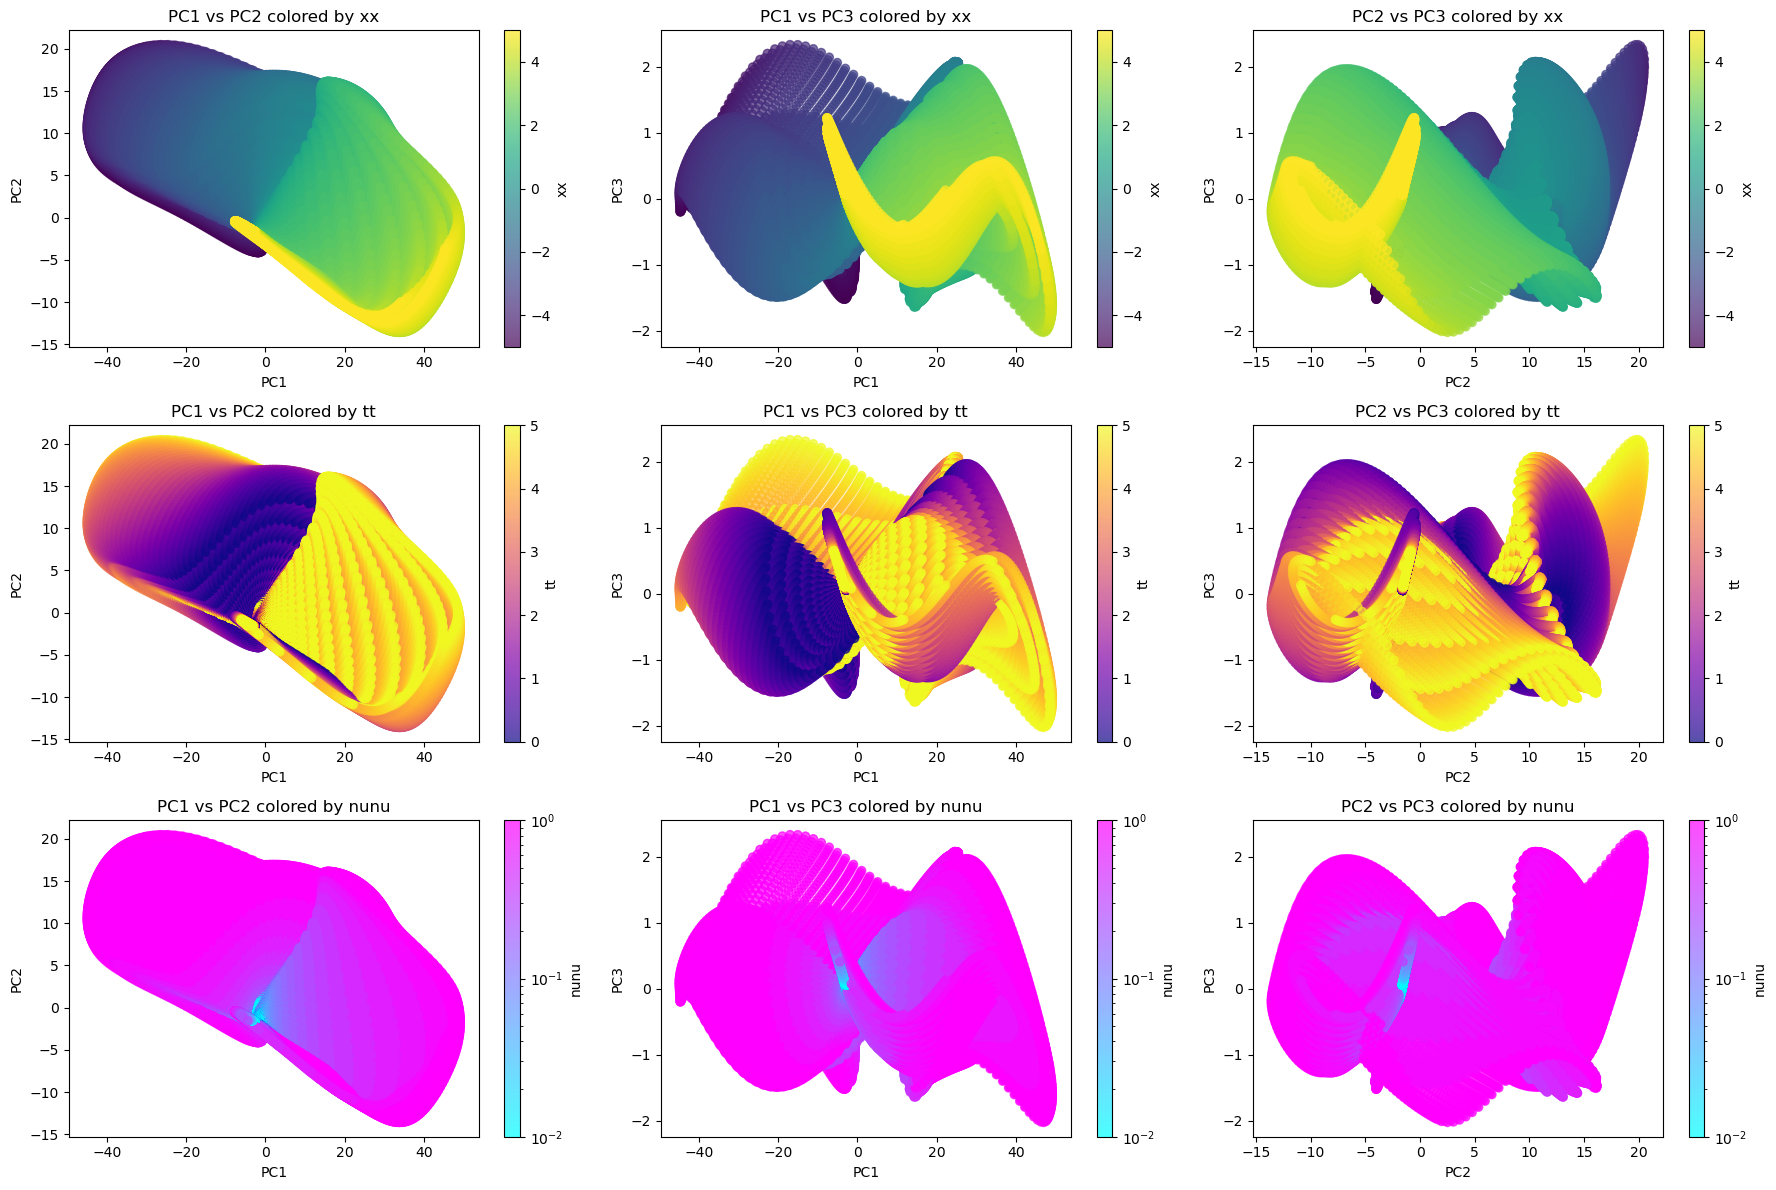

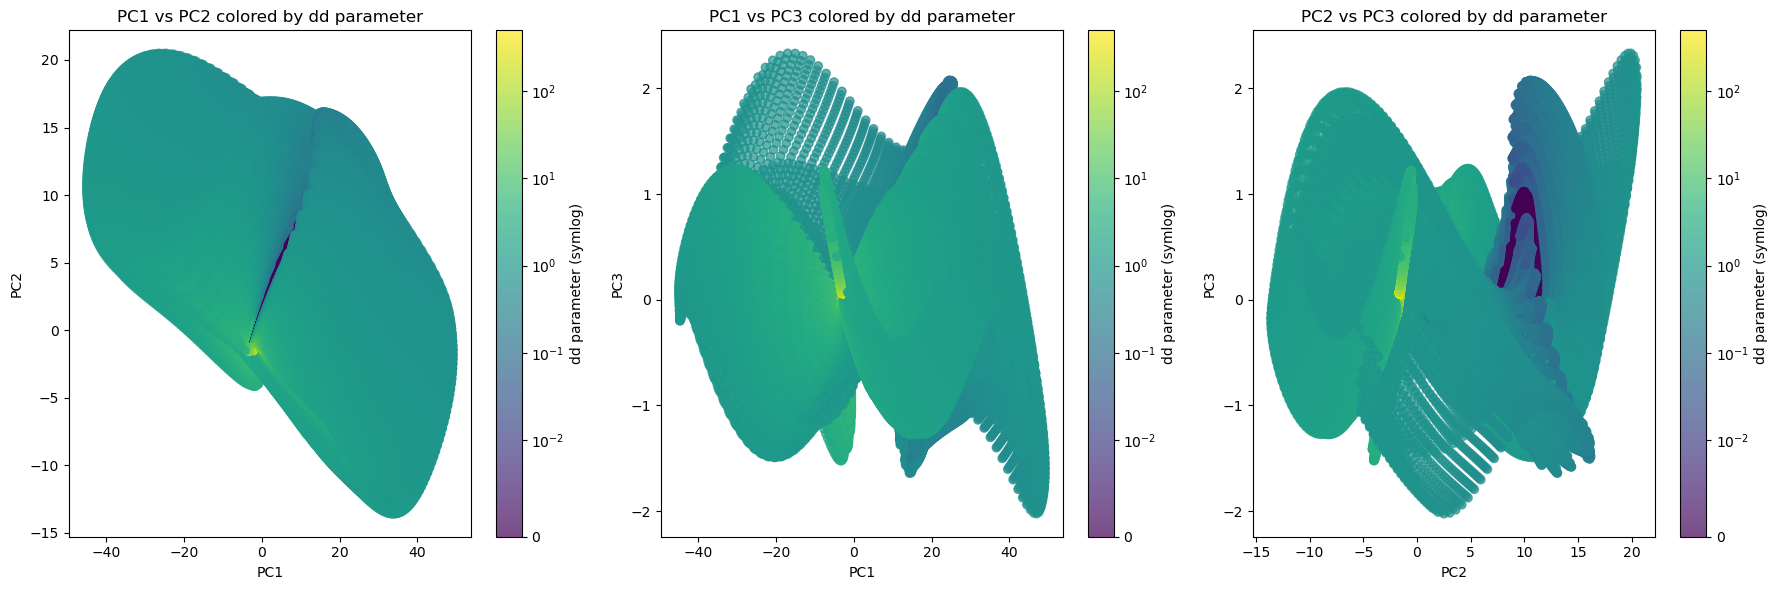

In [5]:
color_vars = [('xx', xx, 'viridis'), ('tt', tt, 'plasma'), ('nunu', nunu, 'cool')]
pc_pairs = [(0, 1), (0, 2), (1, 2)]
pc_labels = [('PC1', 'PC2'), ('PC1', 'PC3'), ('PC2', 'PC3')]

fig, axes = plt.subplots(len(color_vars), len(pc_pairs), figsize=(18, 12))

for i, (color_name, color_data, cmap) in enumerate(color_vars):
    for j, (pc_x, pc_y) in enumerate(pc_pairs):
        ax = axes[i, j]
        if color_name == 'nunu':
            sc = ax.scatter(H_pca_95[:, pc_x], H_pca_95[:, pc_y], c=color_data, cmap=cmap, norm=norm_nu, alpha=0.7)
        else:
            sc = ax.scatter(H_pca_95[:, pc_x], H_pca_95[:, pc_y], c=color_data, cmap=cmap, alpha=0.7)
        ax.set_xlabel(pc_labels[j][0])
        ax.set_ylabel(pc_labels[j][1])
        ax.set_title(f'{pc_labels[j][0]} vs {pc_labels[j][1]} colored by {color_name}')
        fig.colorbar(sc, ax=ax, label=color_name)

plt.tight_layout()
# Save figure in pdf #
plt.savefig('pca_2d_plots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('pca_2d_plots.png', format='png', bbox_inches='tight')
plt.show()

# Plot also the 2D projections of the PCA components using dd_parameter as color coding #
fig_2d, axes_2d = plt.subplots(1, 3, figsize=(18, 6))
for i, (pc_x, pc_y) in enumerate(pc_pairs):
    ax = axes_2d[i]
    if i == 0:  # PC1 vs PC2
        sc = ax.scatter(H_pca_95[:, pc_x], H_pca_95[:, pc_y], c=dd_flat, cmap='viridis', norm=norm_dd, alpha=0.7)
    elif i == 1:  # PC1 vs PC3
        sc = ax.scatter(H_pca_95[:, pc_x], H_pca_95[:, pc_y], c=dd_flat, cmap='viridis', norm=norm_dd, alpha=0.7)
    else:  # PC2 vs PC3
        sc = ax.scatter(H_pca_95[:, pc_x], H_pca_95[:, pc_y], c=dd_flat, cmap='viridis', norm=norm_dd, alpha=0.7)
    
    ax.set_xlabel(pc_labels[i][0])
    ax.set_ylabel(pc_labels[i][1])
    ax.set_title(f'{pc_labels[i][0]} vs {pc_labels[i][1]} colored by dd parameter')
    fig_2d.colorbar(sc, ax=ax, label='dd parameter (symlog)')
plt.tight_layout()
plt.show() 


# Compute the PCA individually for different slices

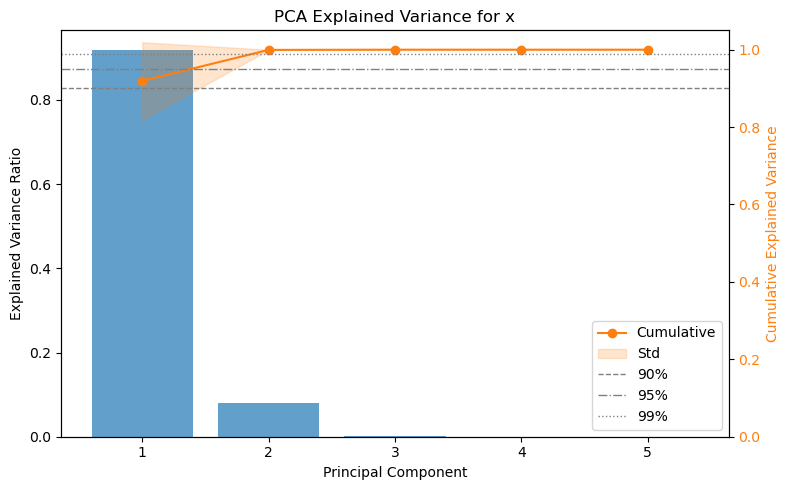

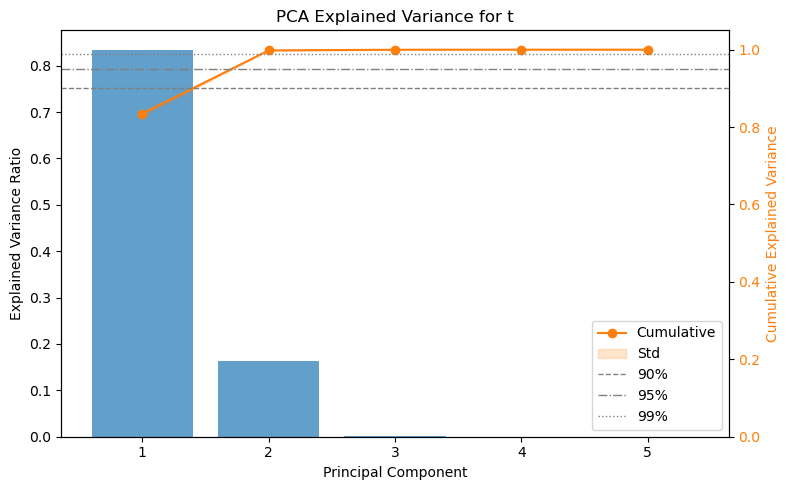

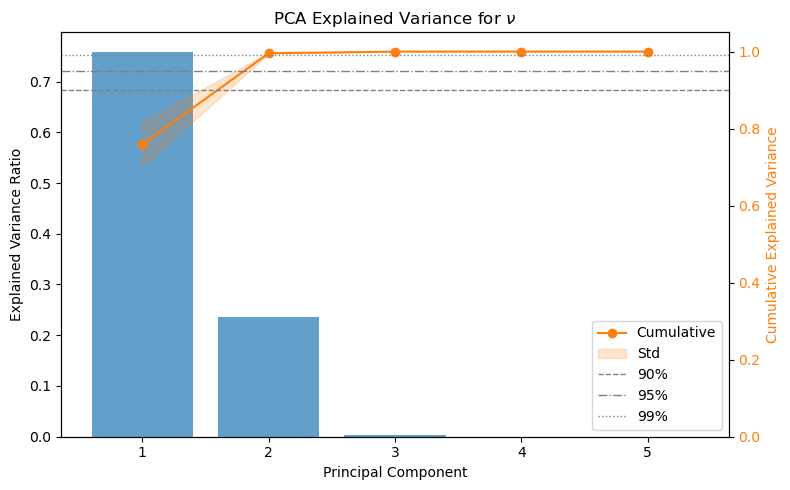

In [6]:
from sklearn.decomposition import PCA

data = np.load('../data_latent.npy')

H = data[:,:,:,3::]
xx =  data[:,:,:,0]
tt =  data[:,:,:,1]
nunu =  data[:,:,:,2]

# Compute the PCA for each of the slices in different directions #
variables = ['x','t','$\\nu$']

all_components = []
all_explained_variance = []
for v in range(len(variables)):
    # Initialize list variables #
    components = []
    explained_variance = []
    if v == 0:
        for i in range(H.shape[0]):
            H_reshaped = H[i, :, :].reshape(-1, H.shape[-1])
            pca = PCA()
            H_pca = pca.fit_transform(H_reshaped)
            components.append(H_pca)
            explained_variance.append(pca.explained_variance_ratio_)
    elif v == 1:
        for i in range(H.shape[1]):
            H_reshaped = H[:, i, :].reshape(-1, H.shape[-1])
            pca = PCA()
            H_pca = pca.fit_transform(H_reshaped)
            components.append(H_pca)
            explained_variance.append(pca.explained_variance_ratio_)
    elif v == 2:
        for i in range(H.shape[2]):
            H_reshaped = H[:, :, i].reshape(-1, H.shape[-1])
            pca = PCA()
            H_pca = pca.fit_transform(H_reshaped)
            components.append(H_pca)
            explained_variance.append(pca.explained_variance_ratio_)
    all_components.append(components)
    all_explained_variance.append(explained_variance)
    # Do a histogram plot of the explained variance mean across slices #
    plt.figure(figsize=(8, 5))
    # Compute mean explained variance across all slices
    explained_variance_mean = np.mean(np.stack(explained_variance), axis=0)
    cum_var = np.cumsum(np.stack(explained_variance), axis=1)
    cum_var_mean = np.mean(cum_var, axis=0)
    cum_var_std = np.std(cum_var, axis=0)
    ax1 = plt.gca()
    ax1.bar(range(1, len(explained_variance_mean) + 1), explained_variance_mean, alpha=0.7, color='C0')
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio')
    ax1.set_title(f'PCA Explained Variance for {variables[v]}')
    # Add right axis for cumulative explained variance
    ax2 = ax1.twinx()
    x_vals = np.arange(1, len(cum_var_mean) + 1)
    ax2.plot(x_vals, cum_var_mean, color='C1', marker='o', label='Cumulative')
    ax2.fill_between(x_vals, cum_var_mean - cum_var_std, cum_var_mean + cum_var_std, color='C1', alpha=0.2, label='Std')
    ax2.set_ylabel('Cumulative Explained Variance', color='C1')
    ax2.tick_params(axis='y', labelcolor='C1')
    ax2.set_ylim(0, 1.05)
    # Add horizontal lines for 90%, 95%, 99%
    for thresh, style, label in zip([0.9, 0.95, 0.99], ['--', '-.', ':'], ['90%', '95%', '99%']):
        ax2.axhline(y=thresh, color='gray', linestyle=style, linewidth=1, label=label)
    ax2.legend(loc='lower right')
    plt.tight_layout()
    # Save figure in pdf #
    plt.savefig(f'pca_explained_variance_{v}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

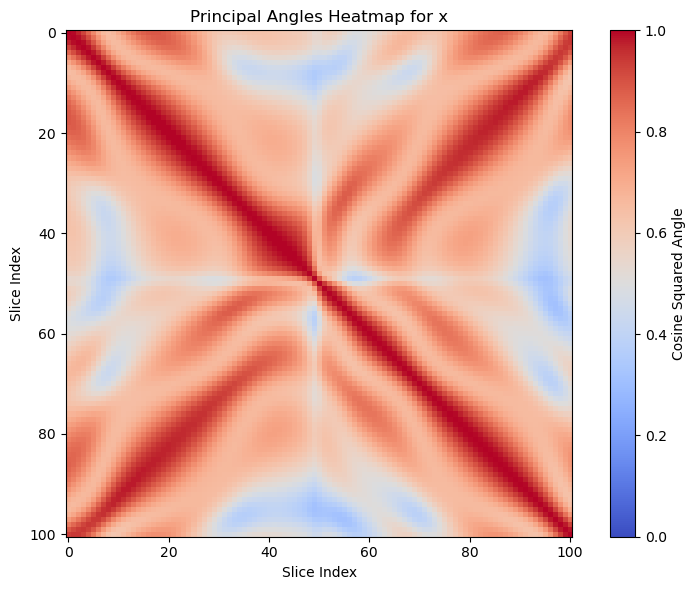

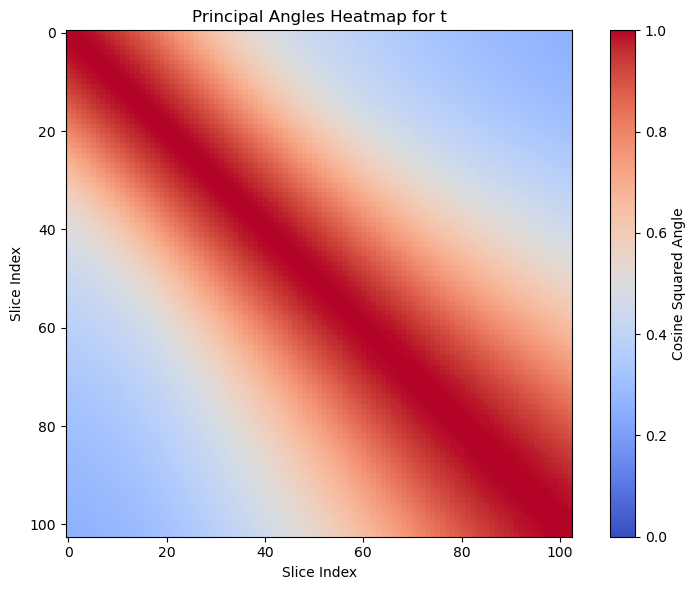

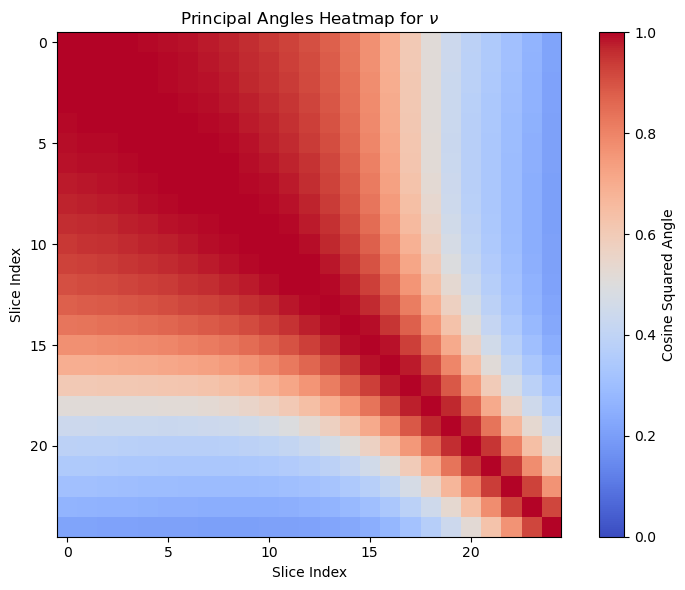

In [7]:
from scipy.linalg import subspace_angles

it = 0
n_components_95 = 3
for v in range(len(variables)):
    components = all_components[v]
    angles = np.ones([len(components),len(components)])
    for i in range(len(components)):
        for j in range(len(components)):
            # Compute the principal angles between the two components
            if i != j:
                cos = np.cos(subspace_angles(components[i][:,:n_components_95], components[j][:,:n_components_95]))**2
                angles[i,j] = np.mean(cos)
    # Do an imshow for the angles for each variable
    plt.figure(figsize=(8, 6))
    im = plt.imshow(angles, cmap='coolwarm', vmin=0, vmax=1)
    plt.colorbar(im, label='Cosine Squared Angle')
    plt.title(f'Principal Angles Heatmap for {variables[v]}')
    plt.xlabel('Slice Index')
    plt.ylabel('Slice Index')
    plt.tight_layout()
    # Savefig in pdf #
    plt.savefig(f'pca_principal_angles_{v}.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    it += 1


# Centroids analysis #

(101, 5)
(103, 5)
(25, 5)


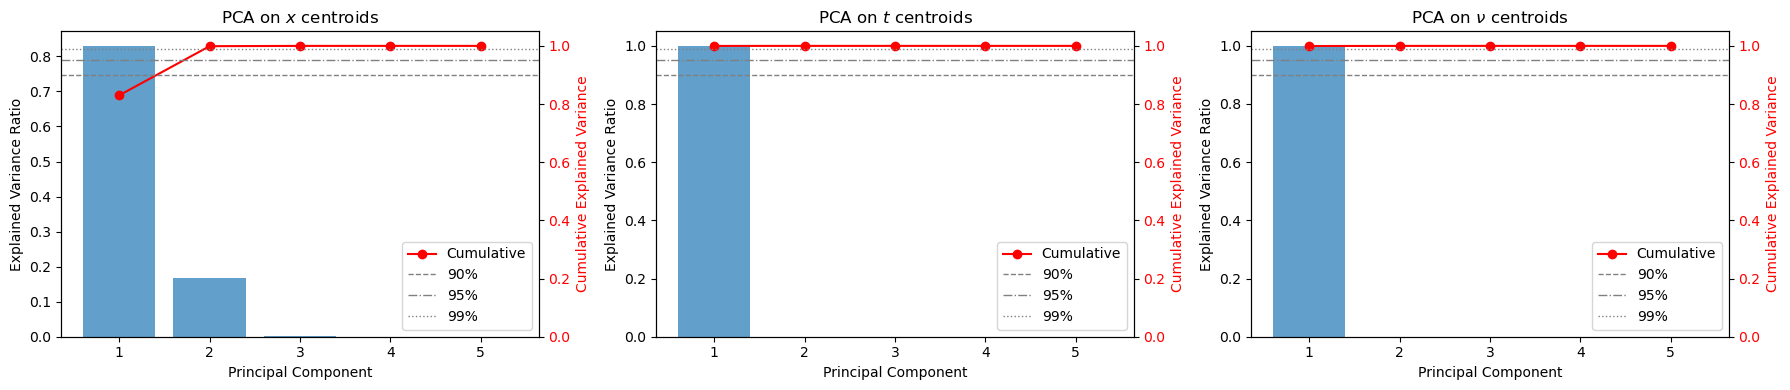

In [8]:
from sklearn.decomposition import PCA

data = np.load('../data_latent.npy')

H = data[:,:,:,3::]
xx =  data[:,:,:,0::]
tt =  data[:,:,:,1::]
nunu =  data[:,:,:,2::]
# Compute the centroids of H data along different directions of the array #

centroids = {}
for axis in range(H.ndim - 1):  # Exclude last dimension (features)
    centroids_axis = []
    for idx in range(H.shape[axis]):
        # Build slicing object: select idx for current axis, all for others
        slicer = [slice(None)] * H.ndim
        slicer[axis] = idx
        # Extract the slice and reshape to 2D (samples, features)
        H_slice = H[tuple(slicer)].reshape(-1, H.shape[-1])
        centroid = H_slice.mean(axis=0)
        centroids_axis.append(centroid)
    centroids[f'axis_{axis}'] = np.stack(centroids_axis)

# Create subplots for all axes' centroids PCA explained variance and cumulative variance
n_axes = len(centroids)
fig, axes = plt.subplots(1, n_axes, figsize=(6 * n_axes, 4))

if n_axes == 1:
    axes = [axes]

titles = ['$x$','$t$','$\\nu$']
i = 0
for ax, (axis_name, centroids_arr) in zip(axes, centroids.items()):
    pca_centroid = PCA()
    print(centroids_arr.shape)
    pca_centroid.fit(centroids_arr)
    # Bar plot for explained variance ratio
    ax.bar(range(1, len(pca_centroid.explained_variance_ratio_) + 1), pca_centroid.explained_variance_ratio_, alpha=0.7)
    ax.set_xlabel('Principal Component')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title(f'PCA on {titles[i]} centroids')
    # Add secondary y-axis for cumulative explained variance
    ax2 = ax.twinx()
    cum_var = np.cumsum(pca_centroid.explained_variance_ratio_)
    ax2.plot(range(1, len(cum_var) + 1), cum_var, color='red', marker='o', label='Cumulative')
    ax2.set_ylabel('Cumulative Explained Variance', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 1.05)
    # Add horizontal lines for 90%, 95%, 99%
    for thresh, style, label in zip([0.9, 0.95, 0.99], ['--', '-.', ':'], ['90%', '95%', '99%']):
        ax2.axhline(y=thresh, color='gray', linestyle=style, linewidth=1, label=label)
    ax2.legend(loc='lower right')
    i+=1

plt.tight_layout()
#Save figure in pdf #
plt.savefig('pca_centroids_explained_variance.pdf', format='pdf', bbox_inches='tight')
plt.show()


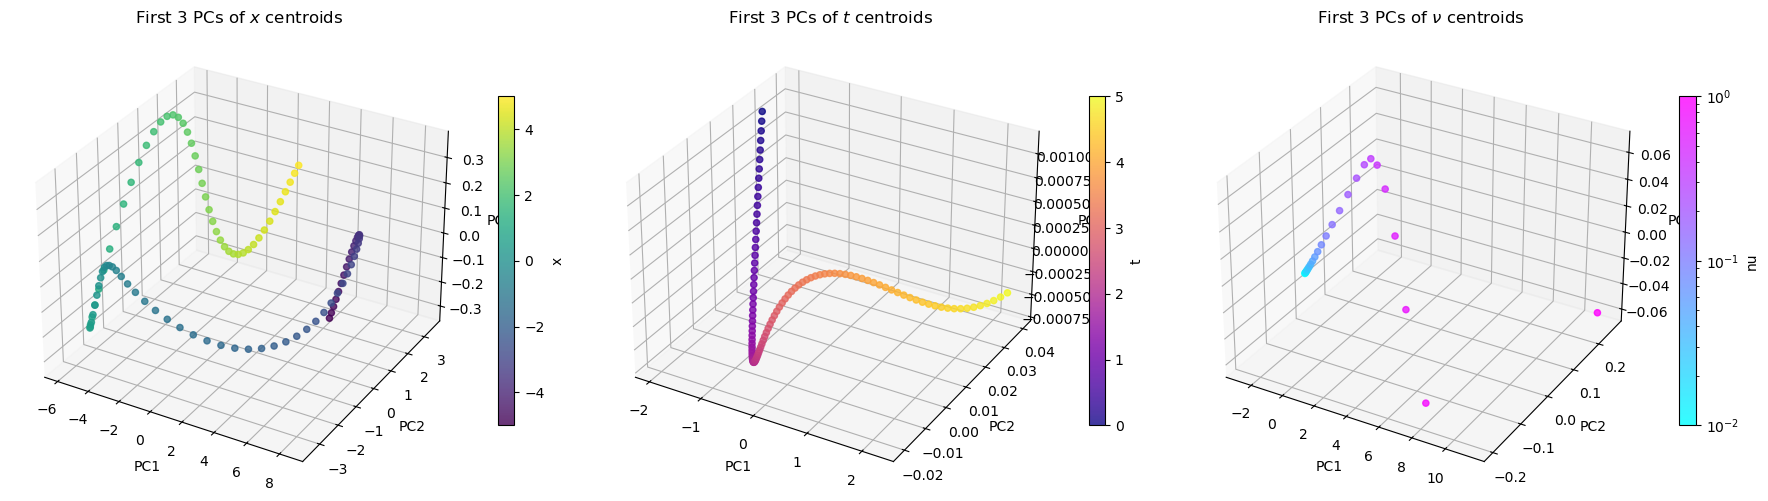

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Plot 3 components of the PCA of each of the centroids set #

titles = ['$x$', '$t$', '$\\nu$']
fig = plt.figure(figsize=(18, 5))

for i, (axis_name, centroids_arr) in enumerate(centroids.items()):
    # PCA on centroids
    pca_centroid = PCA()
    pcs = pca_centroid.fit_transform(centroids_arr)
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    # Choose color values for each axis
    if axis_name == 'axis_0':
        color_vals = xx[:, 0, 0, 0]  # x values
        color_label = 'x'
        cmap = 'viridis'
        norm = None
    elif axis_name == 'axis_1':
        color_vals = xx[0, :, 0, 1]  # t values
        color_label = 't'
        cmap = 'plasma'
        norm = None
    elif axis_name == 'axis_2':
        color_vals = xx[0, 0, :, 2]  # nu values
        color_label = 'nu'
        cmap = 'cool'
        norm = mcolors.LogNorm(vmin=np.min(color_vals[color_vals > 0]), vmax=np.max(color_vals))
    else:
        color_vals = None
        color_label = ''
        cmap = 'viridis'
        norm = None
    sc = ax.scatter(pcs[:, 0], pcs[:, 1], pcs[:, 2], c=color_vals, cmap=cmap, norm=norm, alpha=0.8)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'First 3 PCs of {titles[i]} centroids')
    cbar = fig.colorbar(sc, ax=ax, shrink=0.7)
    cbar.set_label(color_label)

plt.tight_layout()
#Save figure in pdf #
plt.savefig('pca_centroids_3d_plots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('pca_centroids_3d_plots.png', format='png', bbox_inches='tight')
plt.show()


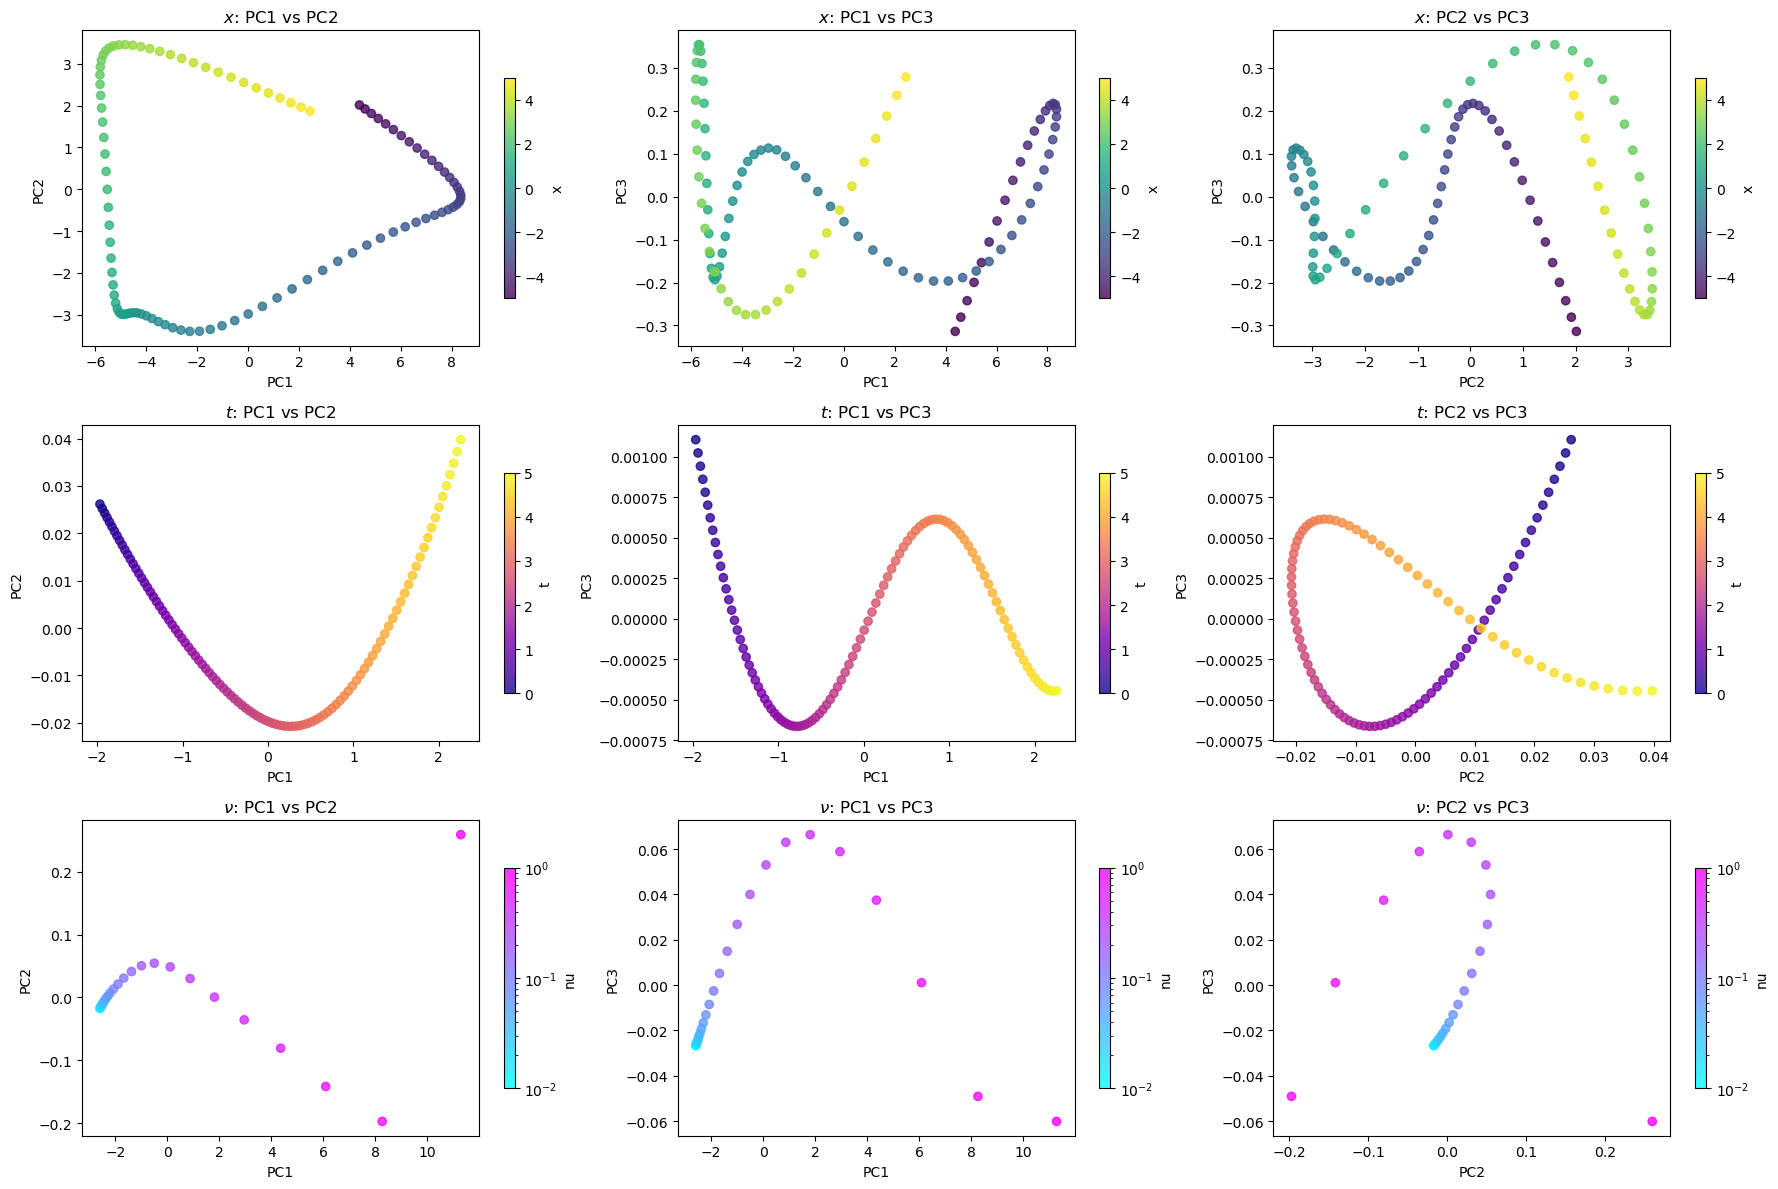

In [10]:
import matplotlib.colors as mcolors

titles = ['$x$', '$t$', '$\\nu$']
pc_pairs = [(0, 1), (0, 2), (1, 2)]
pc_labels = [('PC1', 'PC2'), ('PC1', 'PC3'), ('PC2', 'PC3')]

fig, axes = plt.subplots(len(centroids), len(pc_pairs), figsize=(18, 12))

for i, (axis_name, centroids_arr) in enumerate(centroids.items()):
    pca_centroid = PCA()
    pcs = pca_centroid.fit_transform(centroids_arr)
    # Choose color values for each axis
    if axis_name == 'axis_0':
        color_vals = xx[:, 0, 0, 0]
        color_label = 'x'
        cmap = 'viridis'
        norm = None
    elif axis_name == 'axis_1':
        color_vals = xx[0, :, 0, 1]
        color_label = 't'
        cmap = 'plasma'
        norm = None
    elif axis_name == 'axis_2':
        color_vals = xx[0, 0, :, 2]
        color_label = 'nu'
        cmap = 'cool'
        norm = mcolors.LogNorm(vmin=np.min(color_vals[color_vals > 0]), vmax=np.max(color_vals))
    else:
        color_vals = None
        color_label = ''
        cmap = 'viridis'
        norm = None
    for j, (pc_x, pc_y) in enumerate(pc_pairs):
        ax = axes[i, j]
        sc = ax.scatter(pcs[:, pc_x], pcs[:, pc_y], c=color_vals, cmap=cmap, norm=norm, alpha=0.8)
        ax.set_xlabel(pc_labels[j][0])
        ax.set_ylabel(pc_labels[j][1])
        ax.set_title(f'{titles[i]}: {pc_labels[j][0]} vs {pc_labels[j][1]}')
        cbar = fig.colorbar(sc, ax=ax, shrink=0.7)
        cbar.set_label(color_label)

plt.tight_layout()
# Save figure in pdf #
plt.savefig('pca_centroids_2d_plots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('pca_centroids_2d_plots.png', format='png', bbox_inches='tight')
plt.show()


# UMAP analysis of the latent space

2025-10-28 09:19:09.210925: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-28 09:19:09.928321: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


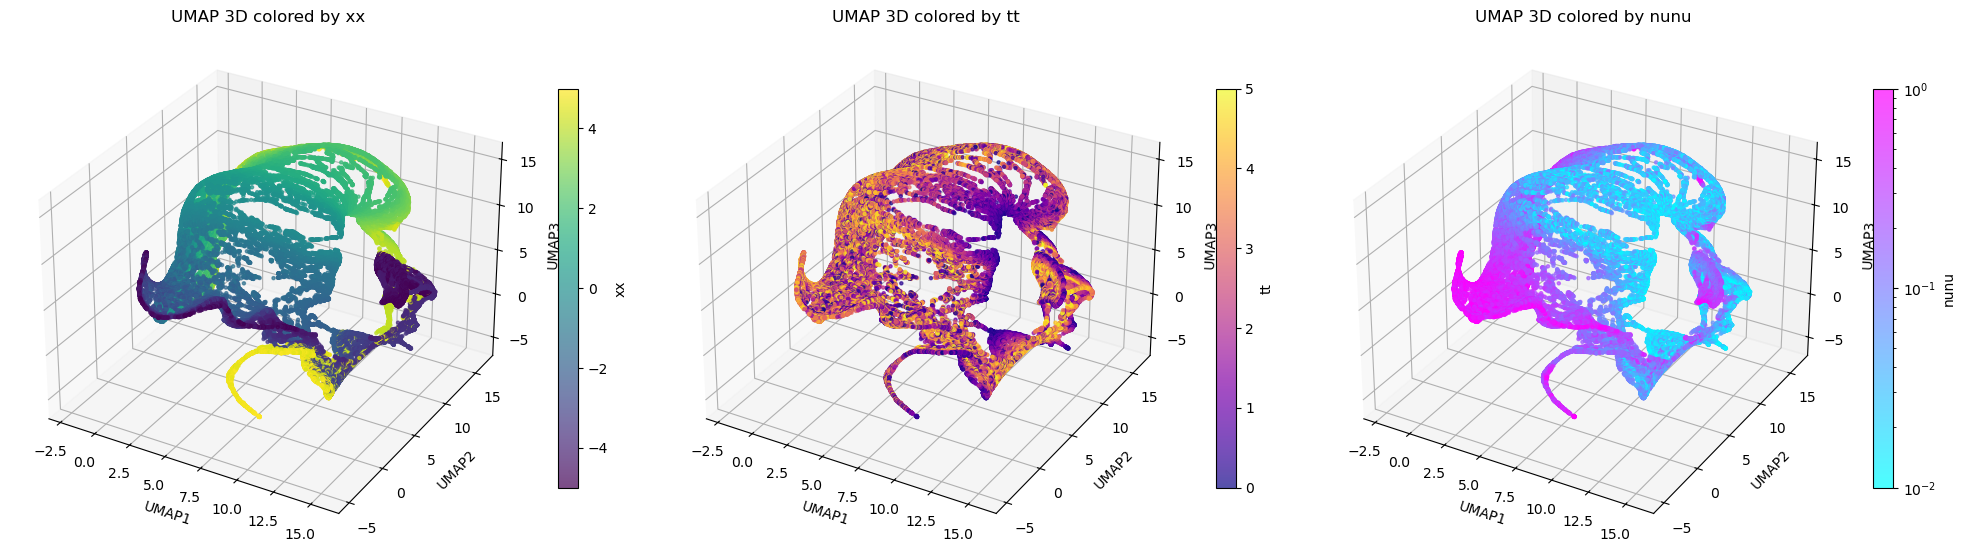

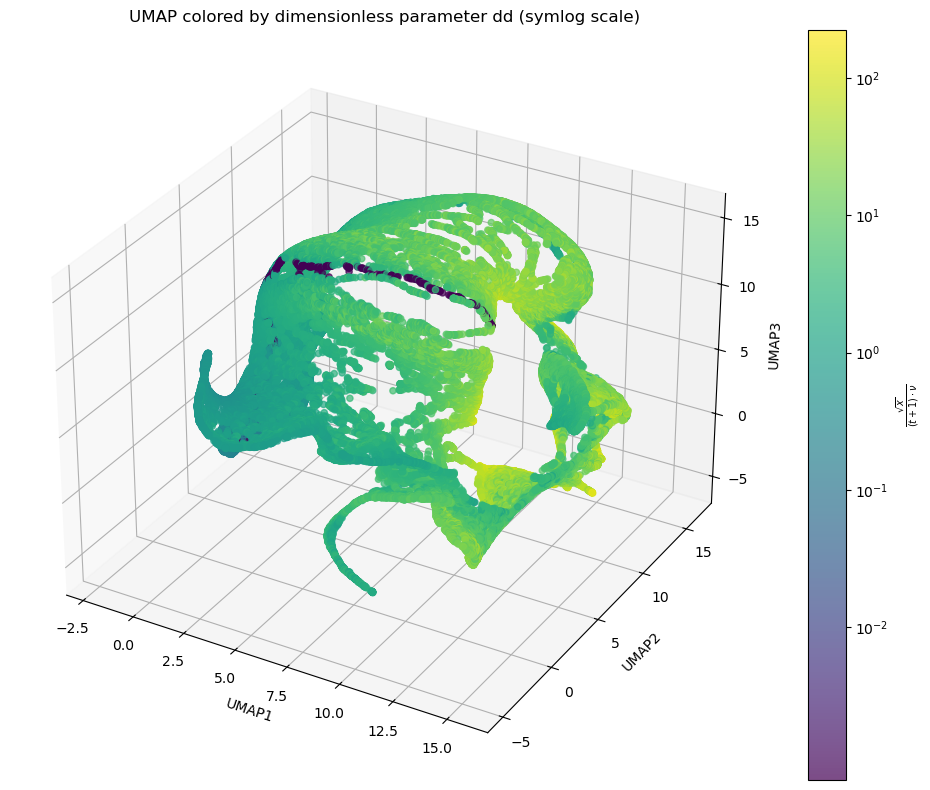

In [11]:
from sklearn.decomposition import PCA
# Use CPU-based UMAP
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D

data = np.load('../data_latent.npy')
H = data[:,:,:,3::]
xx =  data[:,:,:,0]
tt =  data[:,:,:,1]
nunu =  data[:,:,:,2]
# Use the first n_samples elements for faster UMAP computation
n_samples = 50000  # or any number suitable for your hardware

H_reshaped = H.reshape(-1, H.shape[-1])
xx_flat = xx.reshape(-1,1).flatten()
tt_flat = tt.reshape(-1,1).flatten()
nunu_flat = nunu.reshape(-1,1).flatten()

# Take a random subset of n_samples for UMAP
rng = np.random.default_rng()
indices = rng.choice(H_reshaped.shape[0], size=n_samples, replace=False)
H_subset = H_reshaped[indices]
xx_subset = xx_flat[indices]
tt_subset = tt_flat[indices]
nunu_subset = nunu_flat[indices]

# Fit UMAP on the subset for 3 components
umap_model = UMAP(n_components=3)
H_umap = umap_model.fit_transform(H_subset)

import matplotlib.colors as mcolors

color_vars = [
    ('xx', xx_subset, 'viridis', None),
    ('tt', tt_subset, 'plasma', None),
    ('nunu', nunu_subset, 'cool', mcolors.LogNorm(vmin=np.min(nunu_subset[nunu_subset > 0]), vmax=np.max(nunu_subset)))
]

fig = plt.figure(figsize=(20, 6))
for i, (label, color_data, cmap, norm) in enumerate(color_vars):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    sc = ax.scatter(H_umap[:, 0], H_umap[:, 1], H_umap[:, 2], c=color_data, cmap=cmap, norm=norm, s=5, alpha=0.7)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_zlabel('UMAP3')
    ax.set_title(f'UMAP 3D colored by {label}')
    cbar = fig.colorbar(sc, ax=ax, shrink=0.7)
    cbar.set_label(label)

plt.tight_layout()
# Save figure in pdf #
plt.savefig('umap_3d_plots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('umap_3d_plots.png', format='png', bbox_inches='tight')
plt.show()

# Compute the dimensionless quantity governing the equation #
dd_parameter = np.sqrt(abs(xx_subset))/((tt_subset+1) * nunu_subset)

# Do a 3D plot using dd_parameter as color coding with log scale, preserving sign and avoiding zeros
dd_flat = dd_parameter.flatten()
dd_flat_nonzero = dd_flat[dd_flat != 0]
# Use a symmetric log normalization for color scale
norm_dd = mcolors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=dd_flat_nonzero.min(), vmax=dd_flat_nonzero.max(), base=10)
fig_3d_dd, ax_dd = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 8))
sc_dd = ax_dd.scatter(H_umap[:, 0], H_umap[:, 1], H_umap[:, 2], c=dd_flat, cmap='viridis', norm=norm_dd, alpha=0.7)
ax_dd.set_title('UMAP colored by dimensionless parameter dd (symlog scale)')
ax_dd.set_xlabel('UMAP1')
ax_dd.set_ylabel('UMAP2')
ax_dd.set_zlabel('UMAP3')
fig_3d_dd.colorbar(sc_dd, ax=ax_dd, label='$\\frac{\sqrt{x}}{(t+1) \cdot \\nu}$')
plt.tight_layout()
plt.show()

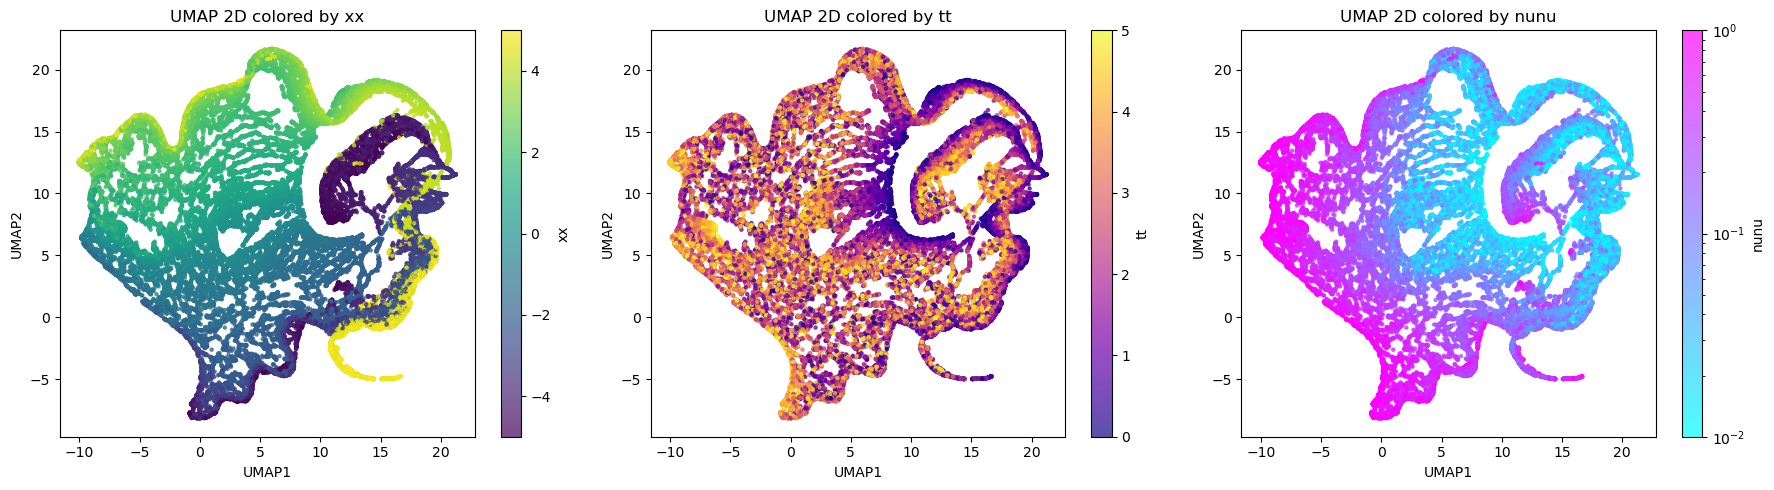

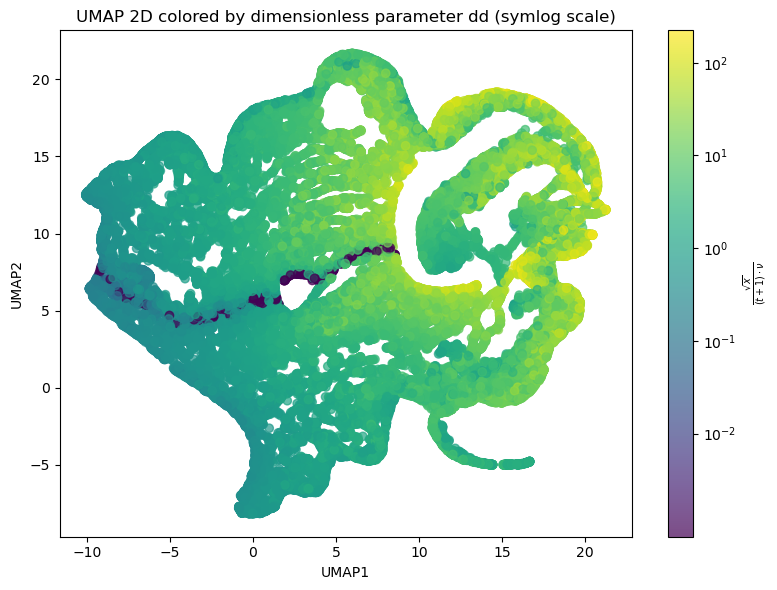

In [12]:
from sklearn.decomposition import PCA
# Use CPU-based UMAP
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D

data = np.load('../data_latent.npy')
H = data[:,:,:,3::]
xx =  data[:,:,:,0].reshape(-1,1)
tt =  data[:,:,:,1].reshape(-1,1)
nunu =  data[:,:,:,2].reshape(-1,1)
# Use the first n_samples elements for faster UMAP computation
n_samples = 50000  # or any number suitable for your hardware

H_reshaped = H.reshape(-1, H.shape[-1])
xx_flat = xx.flatten()
tt_flat = tt.flatten()
nunu_flat = nunu.flatten()

# Take a random subset of n_samples for UMAP
indices = rng.choice(H_reshaped.shape[0], size=n_samples, replace=False)
H_subset = H_reshaped[indices]
xx_subset = xx_flat[indices]
tt_subset = tt_flat[indices]
nunu_subset = nunu_flat[indices]

# Fit UMAP on the subset for 2 components
umap_model_2d = UMAP(n_components=2)
H_umap_2d = umap_model_2d.fit_transform(H_subset)

import matplotlib.colors as mcolors

color_vars_2d = [
    ('xx', xx_subset, 'viridis', None),
    ('tt', tt_subset, 'plasma', None),
    ('nunu', nunu_subset, 'cool', mcolors.LogNorm(vmin=np.min(nunu_subset[nunu_subset > 0]), vmax=np.max(nunu_subset)))
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (label, color_data, cmap, norm) in enumerate(color_vars_2d):
    ax = axes[i]
    sc = ax.scatter(H_umap_2d[:, 0], H_umap_2d[:, 1], c=color_data, cmap=cmap, norm=norm, s=5, alpha=0.7)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_title(f'UMAP 2D colored by {label}')
    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label(label)

plt.tight_layout()
# Save fig in pdf #
plt.savefig('umap_2d_plots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('umap_2d_plots.png', format='png', bbox_inches='tight')
plt.show()

# Do the 2D projection using as color coding the dimensionless parameter dd #
dd_parameter = np.sqrt(abs(xx_subset))/((tt_subset+1) * nunu_subset)
# Do a 2D plot using dd_parameter as color coding with log scale, preserving sign and avoiding zeros
dd_flat = dd_parameter.flatten()
dd_flat_nonzero = dd_flat[dd_flat != 0]
# Use a symmetric log normalization for color scale
norm_dd = mcolors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=dd_flat_nonzero.min(), vmax=dd_flat_nonzero.max(), base=10)
fig_2d_dd, ax_dd = plt.subplots(figsize=(8, 6))
sc_dd = ax_dd.scatter(H_umap_2d[:, 0], H_umap_2d[:, 1], c=dd_flat, cmap='viridis', norm=norm_dd, alpha=0.7)
ax_dd.set_title('UMAP 2D colored by dimensionless parameter dd (symlog scale)')
ax_dd.set_xlabel('UMAP1')
ax_dd.set_ylabel('UMAP2')
fig_2d_dd.colorbar(sc_dd, ax=ax_dd, label='$\\frac{\sqrt{x}}{(t+1) \cdot \\nu}$')
plt.tight_layout()
plt.show()


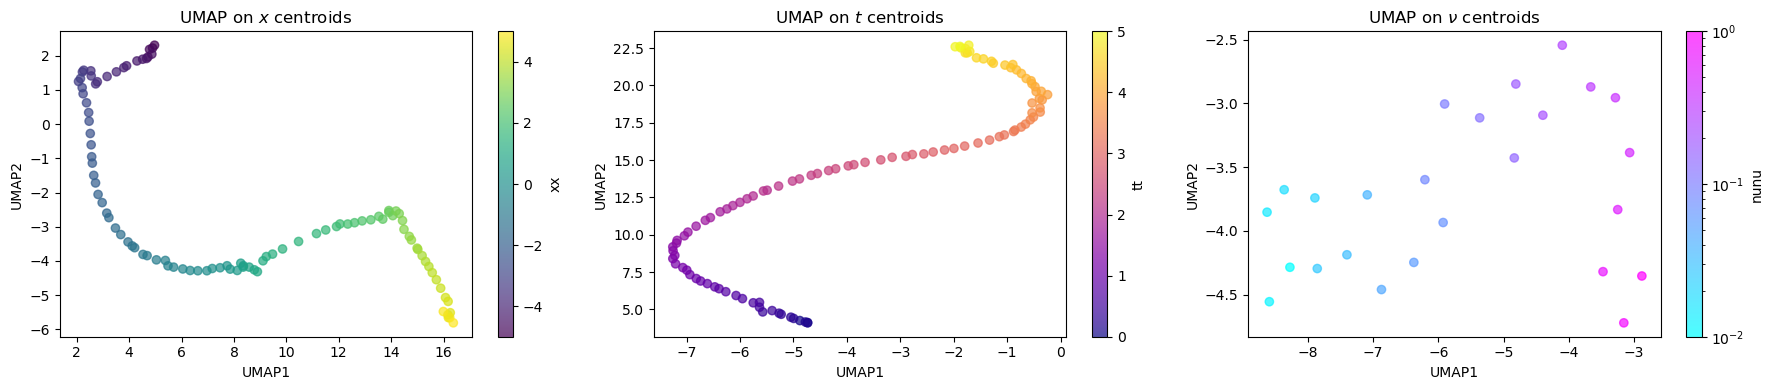

In [13]:
from sklearn.decomposition import PCA
import umap

data = np.load('../data_latent.npy')

H = data[:,:,:,3::]
xx =  data[:,:,:,0]
tt =  data[:,:,:,1]
nunu =  data[:,:,:,2]
# Use the first n_samples elements for faster UMAP computation
n_samples = 20000  # or any number suitable for your hardware

H_reshaped = H.reshape(-1, H.shape[-1])
xx_flat = xx.flatten()
tt_flat = tt.flatten()
nunu_flat = nunu.flatten()

# Take a random subset of n_samples for UMAP
indices = rng.choice(H_reshaped.shape[0], size=n_samples, replace=False)
H_subset = H_reshaped[indices]
xx_subset = xx_flat[indices]
tt_subset = tt_flat[indices]
nunu_subset = nunu_flat[indices]
# Compute the centroids of H data along different directions of the array #

centroids = {}
for axis in range(H.ndim - 1):  # Exclude last dimension (features)
    centroids_axis = []
    for idx in range(H.shape[axis]):
        # Build slicing object: select idx for current axis, all for others
        slicer = [slice(None)] * H.ndim
        slicer[axis] = idx
        # Extract the slice and reshape to 2D (samples, features)
        H_slice = H[tuple(slicer)].reshape(-1, H.shape[-1])
        centroid = H_slice.mean(axis=0)
        centroids_axis.append(centroid)
    centroids[f'axis_{axis}'] = np.stack(centroids_axis)

import matplotlib.colors as mcolors

color_vars = [
    ('xx', xx[:, 0, 0], 'viridis', None),
    ('tt', tt[0, :, 0], 'plasma', None),
    ('nunu', nunu[0, 0, :], 'cool', mcolors.LogNorm(vmin=np.min(nunu[0, 0, :][nunu[0, 0, :] > 0]), vmax=np.max(nunu[0, 0, :])))
]

n_axes = len(centroids)
fig, axes = plt.subplots(1, n_axes, figsize=(6 * n_axes, 4))

if n_axes == 1:
    axes = [axes]

titles = ['$x$', '$t$', '$\\nu$']
for i, (ax, (axis_name, centroids_arr)) in enumerate(zip(axes, centroids.items())):
    reducer = umap.UMAP(n_components=2)
    embedding = reducer.fit_transform(centroids_arr)
    color_label, color_data, cmap, norm = color_vars[i]
    sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=color_data, cmap=cmap, norm=norm, alpha=0.7)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_title(f'UMAP on {titles[i]} centroids')
    fig.colorbar(sc, ax=ax, label=color_label)

plt.tight_layout()
# Save fig in pdf #
plt.savefig('umap_centroids_2d_plots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('umap_centroids_2d_plots.png', format='png', bbox_inches='tight')
plt.show()


# Autoencoder analysis of the latent space

Epoch 1/50, Loss: 2.106212, LR: 0.001000
Epoch 5/50, Loss: 0.020594, LR: 0.001000
Epoch 10/50, Loss: 0.005310, LR: 0.001000
Epoch 15/50, Loss: 0.003303, LR: 0.000750
Epoch 20/50, Loss: 0.001484, LR: 0.000750
Epoch 25/50, Loss: 0.001870, LR: 0.000750
Epoch 30/50, Loss: 0.001262, LR: 0.000563
Epoch 35/50, Loss: 0.000766, LR: 0.000563
Epoch 40/50, Loss: 0.000425, LR: 0.000563
Epoch 45/50, Loss: 0.000779, LR: 0.000422
Epoch 50/50, Loss: 0.000563, LR: 0.000422


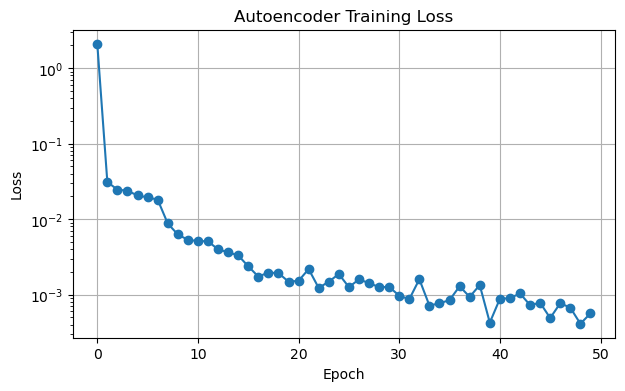

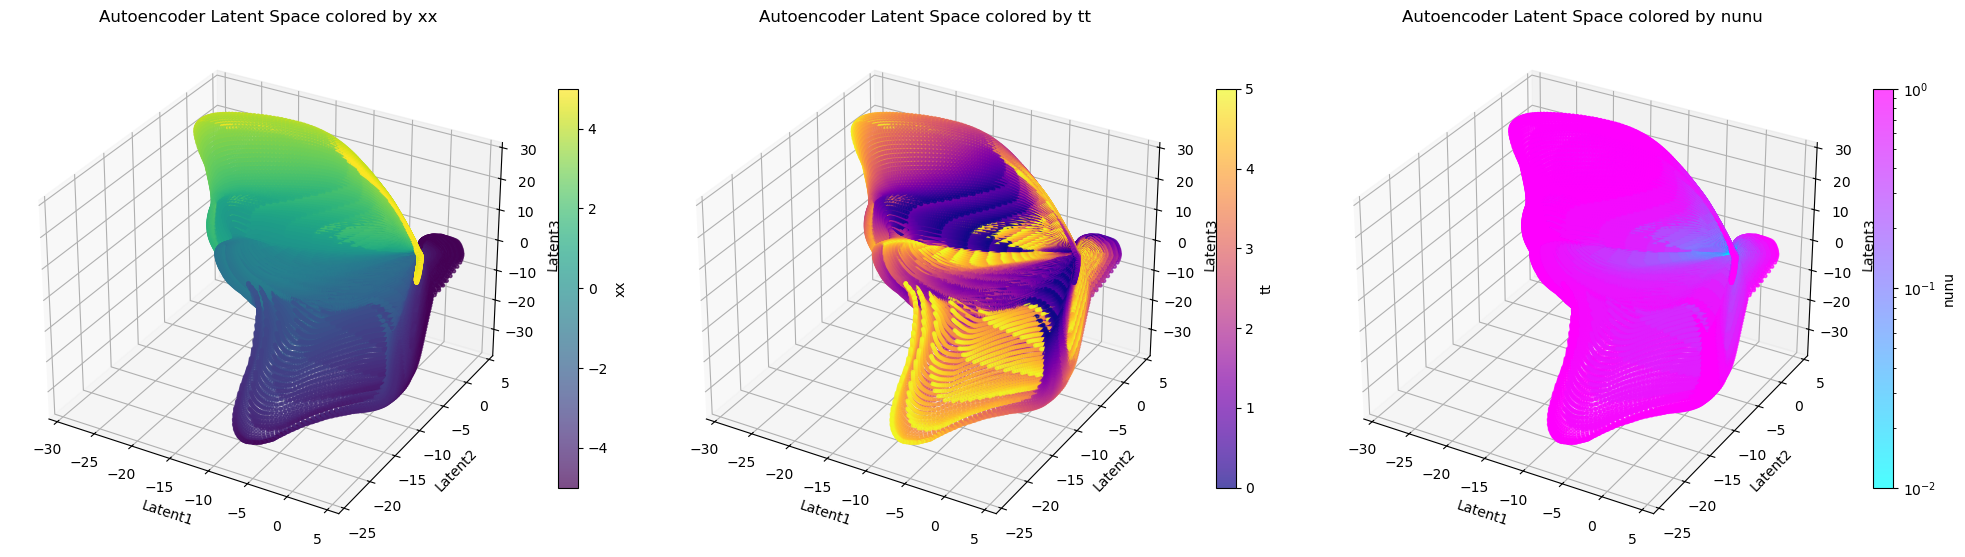

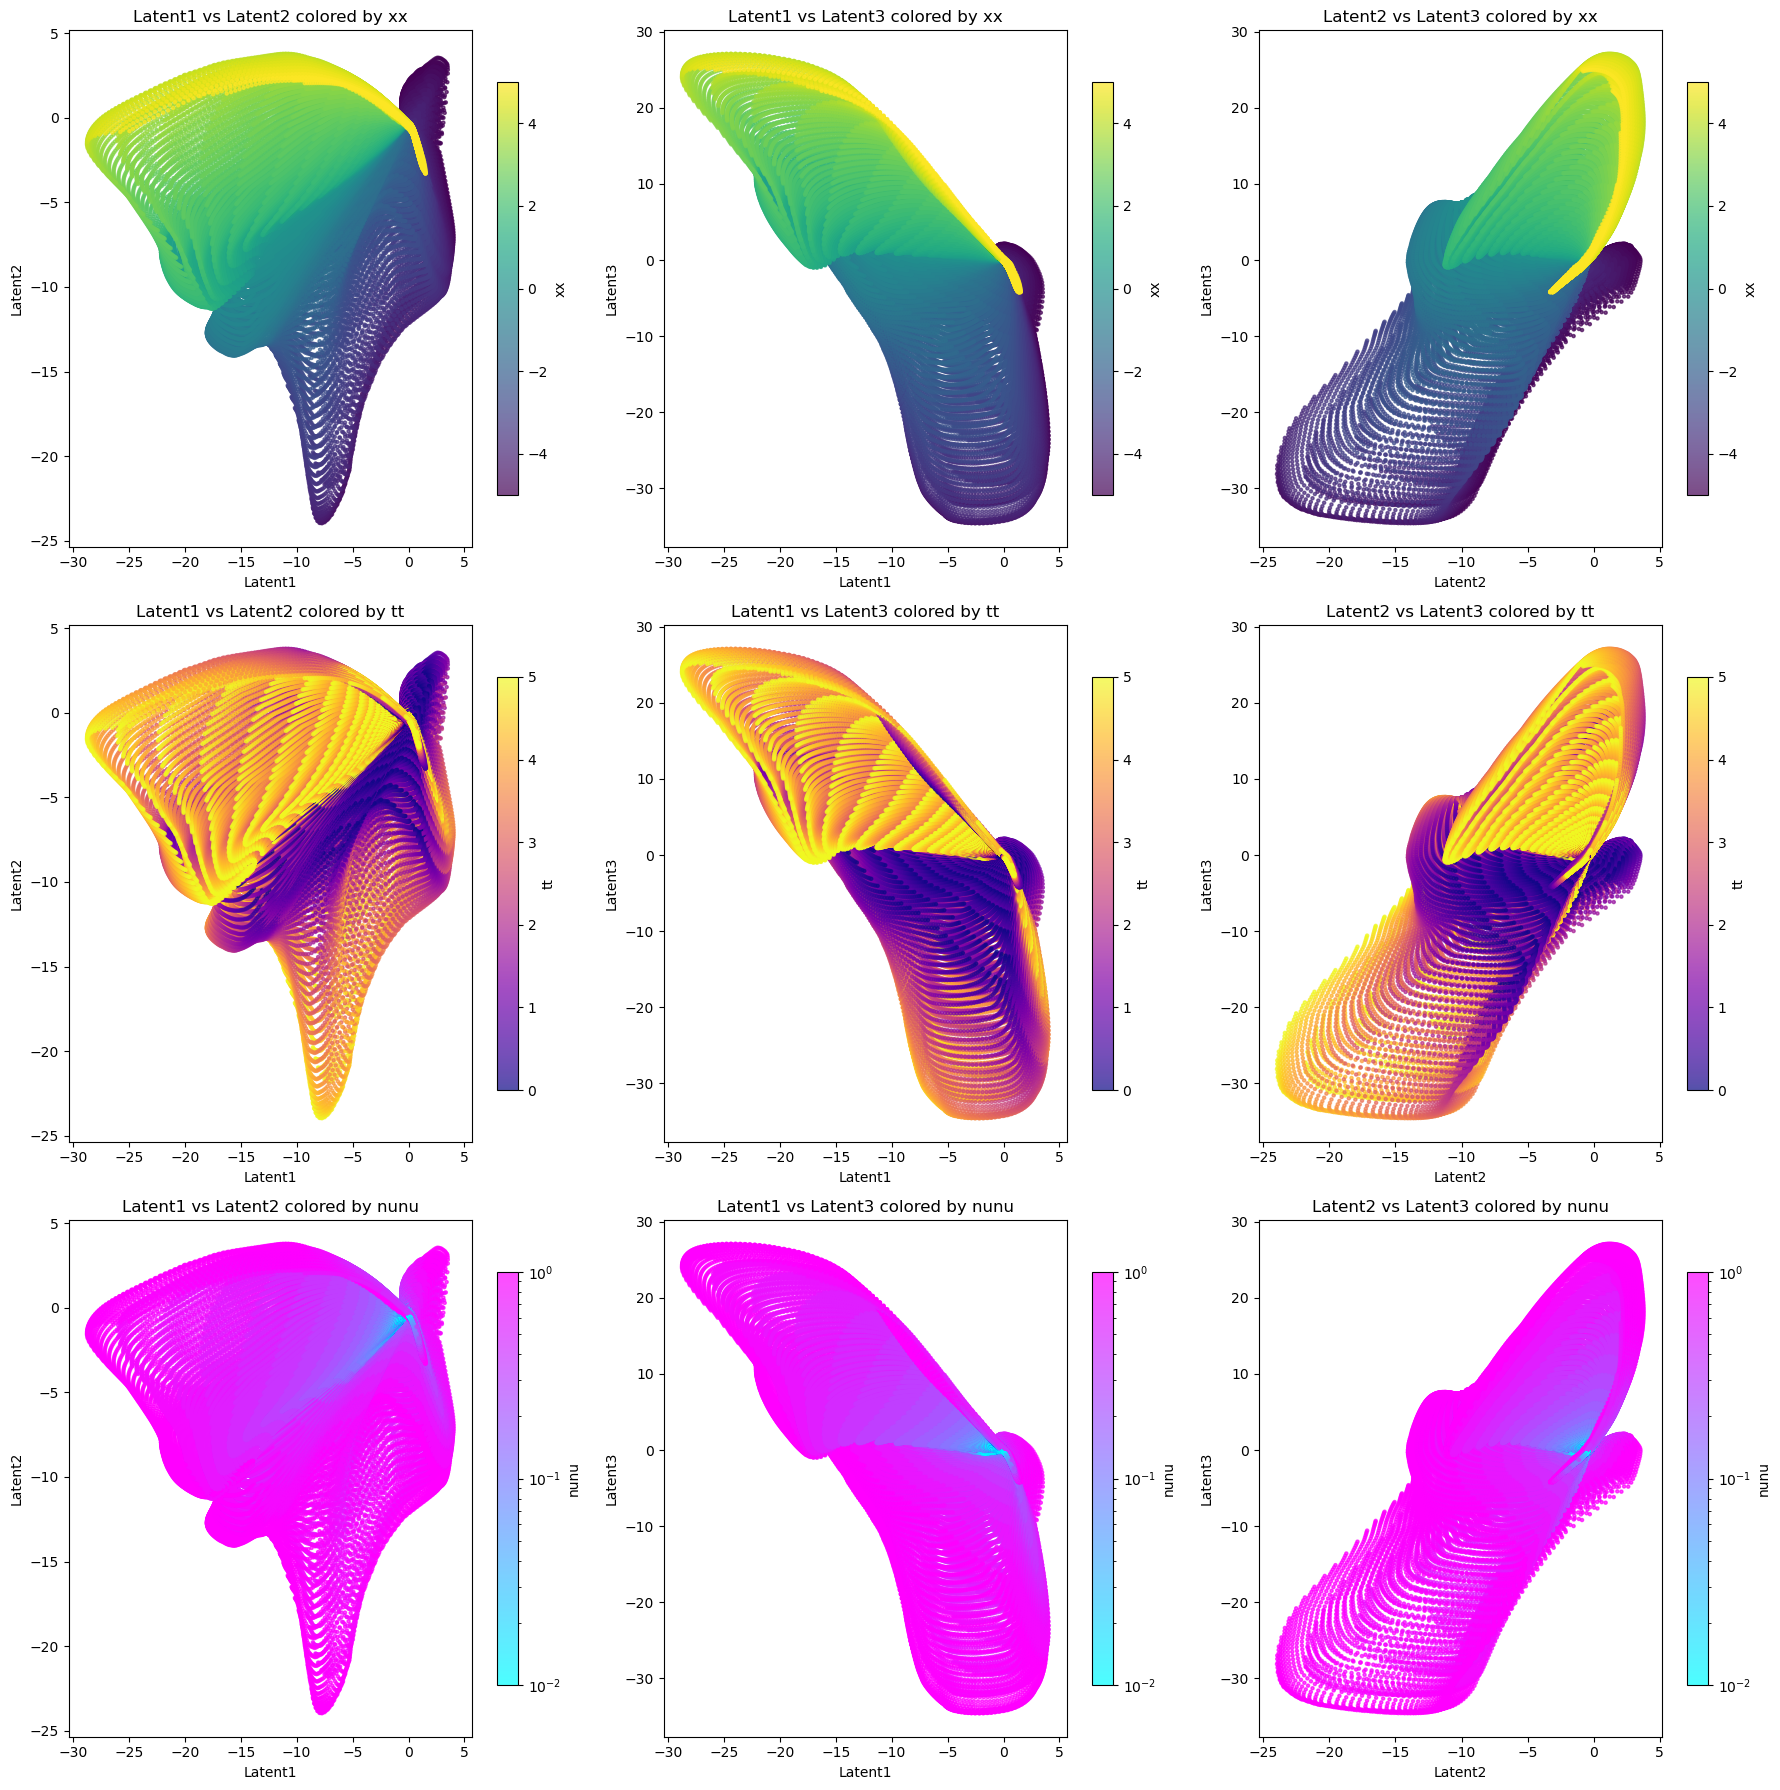

In [14]:
from sklearn.decomposition import PCA
# Use CPU-based UMAP
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import torch
from itertools import combinations

data = np.load('../data_latent.npy')
H = data[:,:,:,3::]
xx =  data[:,:,:,0].reshape(-1,1)
tt =  data[:,:,:,1].reshape(-1,1)
nunu =  data[:,:,:,2].reshape(-1,1)

import torch.nn as nn
import torch.optim as optim

# Prepare data: flatten H to 2D (samples, features)
H_reshaped = H.reshape(-1, H.shape[-1])
X = torch.tensor(H_reshaped, dtype=torch.float32)

# Define autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim, activation=nn.ReLU):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            activation(),
            nn.Linear(128, 64),
            activation(),
            nn.Linear(64, 32),
            activation(),
            nn.Linear(32, 16),
            activation(),
            nn.Linear(16, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 16),
            activation(),
            nn.Linear(16, 32),
            activation(),
            nn.Linear(32, 64),
            activation(),
            nn.Linear(64, 128),
            activation(),
            nn.Linear(128, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

input_dim = X.shape[1]
latent_dim = 3
model = Autoencoder(input_dim, latent_dim,activation=nn.ReLU)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
# Add a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.75)

# Train autoencoder and record loss
n_epochs = 50
batch_size = X.shape[0] // 1000  # Use 100 batches
loss_history = []
for epoch in range(n_epochs):
    perm = torch.randperm(X.size(0))
    epoch_loss = 0.0
    num_batches = 0
    for i in range(0, X.size(0), batch_size):
        idx = perm[i:i+batch_size]
        batch = X[idx]
        optimizer.zero_grad()
        output = model(batch)
        loss = criterion(output, batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        num_batches += 1
    scheduler.step()
    avg_loss = epoch_loss / num_batches
    loss_history.append(avg_loss)
    if (epoch+1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.6f}, LR: {scheduler.get_last_lr()[0]:.6f}")

# Plot loss history
plt.figure(figsize=(7, 4))
plt.plot(loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.grid(True)
plt.yscale('log')
plt.show()

# Get latent representations
with torch.no_grad():
    H_latent = model.encoder(X).numpy()

# Visualize latent space colored by xx, tt, nunu (use full data)
import matplotlib.colors as mcolors

color_vars = [
    ('xx', xx, 'viridis', None),
    ('tt', tt, 'plasma', None),
    ('nunu', nunu, 'cool', mcolors.LogNorm(vmin=np.min(nunu[nunu > 0]), vmax=np.max(nunu)))
]

fig = plt.figure(figsize=(20, 6))
for i, (label, color_data, cmap, norm) in enumerate(color_vars):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    sc = ax.scatter(H_latent[:, 0], H_latent[:, 1], H_latent[:, 2], c=color_data, cmap=cmap, norm=norm, s=5, alpha=0.7)
    ax.set_xlabel('Latent1')
    ax.set_ylabel('Latent2')
    ax.set_zlabel('Latent3')
    ax.set_title(f'Autoencoder Latent Space colored by {label}')
    cbar = fig.colorbar(sc, ax=ax, shrink=0.7)
    cbar.set_label(label)

plt.tight_layout()
# Save fig in pdf #
plt.savefig('autoencoder_3d_plots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('autoencoder_3d_plots.png', format='png', bbox_inches='tight')
plt.show()

# Add the 2D projections #

latent_labels = ['Latent1', 'Latent2', 'Latent3']
color_vars_2d = [
    ('xx', xx, 'viridis', None),
    ('tt', tt, 'plasma', None),
    ('nunu', nunu, 'cool', mcolors.LogNorm(vmin=np.min(nunu[nunu > 0]), vmax=np.max(nunu)))
]

fig_2d, axes_2d = plt.subplots(3, 3, figsize=(18, 18))
for row, (color_label, color_data, cmap, norm) in enumerate(color_vars_2d):
    for col, (i, j) in enumerate(combinations(range(3), 2)):
        ax = axes_2d[row, col]
        sc = ax.scatter(H_latent[:, i], H_latent[:, j], c=color_data, cmap=cmap, norm=norm, s=5, alpha=0.7)
        ax.set_xlabel(latent_labels[i])
        ax.set_ylabel(latent_labels[j])
        ax.set_title(f'{latent_labels[i]} vs {latent_labels[j]} colored by {color_label}')
        cbar = plt.colorbar(sc, ax=ax, shrink=0.8)
        cbar.set_label(color_label)
    # Hide unused subplot (last column)
    for k in range(col+1, 3):
        axes_2d[row, k].axis('off')

plt.tight_layout()
# Save fig in pdf #
plt.savefig('autoencoder_2d_plots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('autoencoder_2d_plots.png', format='png', bbox_inches='tight')
plt.show()


(101, 103, 25)
Creating animation with 25 frames...
Saving animation as GIF (this may take a while)...


Animation saved as 'pca_viscosity_animation.gif'


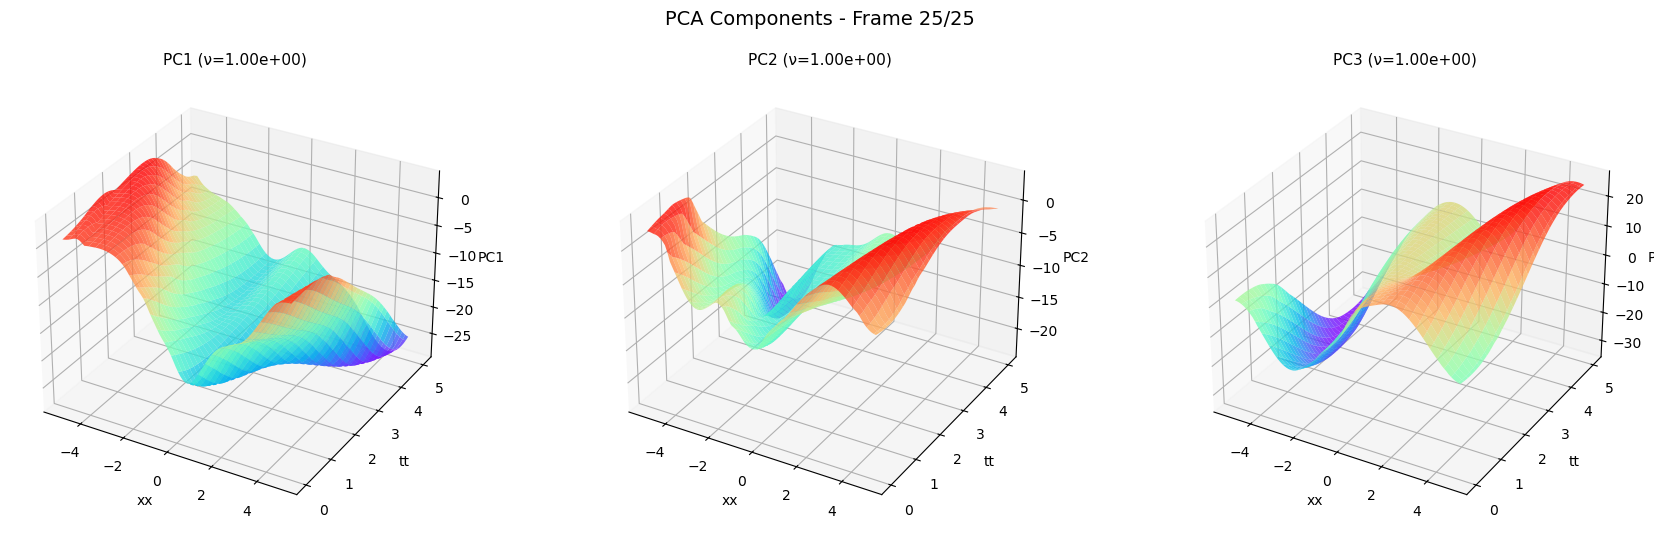

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Get again the lists without reshape #
xx =  data[:,:,:,0]
tt =  data[:,:,:,1]
nunu =  data[:,:,:,2]
# Reshape components
H_r_1 = H_latent[:, 0].reshape(xx.shape)
H_r_2 = H_latent[:, 1].reshape(xx.shape)
H_r_3 = H_latent[:, 2].reshape(xx.shape)

# Get the number of viscosity levels
print(xx.shape)
n_viscosity = xx.shape[2]

# Create figure and 3D subplots
fig = plt.figure(figsize=(18, 6))
fig.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.08, wspace=0.3)
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

# Store components
H_components = [H_r_1, H_r_2, H_r_3]
component_names = ['PC1', 'PC2', 'PC3']

# Initialize surfaces
surfaces = []
for i, (ax, H_comp, name) in enumerate(zip(axes, H_components, component_names)):
    surf = ax.plot_surface(xx[:, :, 0], tt[:, :, 0], 
                          H_comp[:, :, 0], cmap='rainbow',
                          alpha=0.8, edgecolor='none')
    surfaces.append(surf)
    ax.set_xlabel('xx', fontsize=10)
    ax.set_ylabel('tt', fontsize=10)
    ax.set_zlabel(name, fontsize=10)
    ax.set_title(f'{name} (ν={nunu[0, 0, 0]:.2e})', fontsize=11)
    
    # Set consistent z-limits for better comparison
    ax.set_zlim(H_comp.min(), H_comp.max())

# No tight_layout since we manually adjusted spacing

# Animation update function
def update_frame(frame):
    idx = frame
    viscosity = nunu[0, 0, idx]
    
    for i, (ax, surf, H_comp, name) in enumerate(zip(axes, surfaces, H_components, component_names)):
        # Remove old surface
        surf.remove()
        
        # Plot new surface
        new_surf = ax.plot_surface(xx[:, :, idx], tt[:, :, idx], 
                                    H_comp[:, :, idx], cmap='rainbow',
                                    alpha=0.8, edgecolor='none')
        surfaces[i] = new_surf
        
        # Update title
        ax.set_title(f'{name} (ν={viscosity:.2e})', fontsize=11)
    
    # Update main title
    fig.suptitle(f'PCA Components - Frame {frame+1}/{n_viscosity}', 
                 fontsize=14, y=0.98)
    
    return surfaces

# Create animation
print(f"Creating animation with {n_viscosity} frames...")
anim = FuncAnimation(fig, update_frame, frames=n_viscosity, 
                     interval=200, blit=False, repeat=True)

# Save as GIF
print("Saving animation as GIF (this may take a while)...")
writer = PillowWriter(fps=5)  # 5 frames per second
anim.save('autoenconder_surface_animation.gif', writer=writer, dpi=120, 
          savefig_kwargs={'bbox_inches': 'tight', 'pad_inches': 0.2})

print("Animation saved as 'pca_viscosity_animation.gif'")


plt.show()

Epoch 1/100, Loss: 1.688944, LR: 0.001000
Epoch 5/100, Loss: 0.018681, LR: 0.001000
Epoch 10/100, Loss: 0.016453, LR: 0.001000
Epoch 15/100, Loss: 0.015313, LR: 0.000500
Epoch 20/100, Loss: 0.013999, LR: 0.000500
Epoch 25/100, Loss: 0.013657, LR: 0.000500
Epoch 30/100, Loss: 0.013282, LR: 0.000250
Epoch 35/100, Loss: 0.012716, LR: 0.000250
Epoch 40/100, Loss: 0.012588, LR: 0.000250
Epoch 45/100, Loss: 0.012421, LR: 0.000125
Epoch 50/100, Loss: 0.012068, LR: 0.000125
Epoch 55/100, Loss: 0.011971, LR: 0.000125
Epoch 60/100, Loss: 0.011886, LR: 0.000063
Epoch 65/100, Loss: 0.011688, LR: 0.000063
Epoch 70/100, Loss: 0.011632, LR: 0.000063
Epoch 75/100, Loss: 0.011589, LR: 0.000031
Epoch 80/100, Loss: 0.011460, LR: 0.000031
Epoch 85/100, Loss: 0.011430, LR: 0.000031
Epoch 90/100, Loss: 0.011409, LR: 0.000016
Epoch 95/100, Loss: 0.011347, LR: 0.000016
Epoch 100/100, Loss: 0.011333, LR: 0.000016


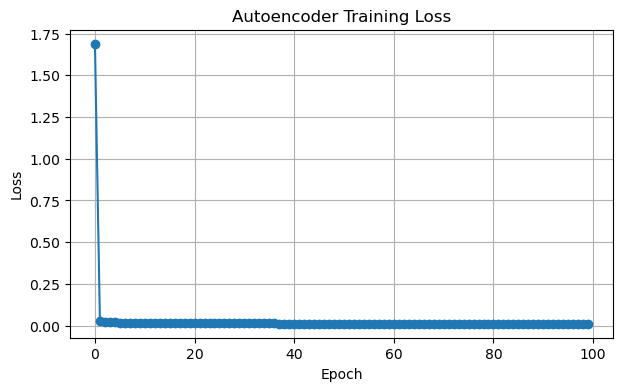

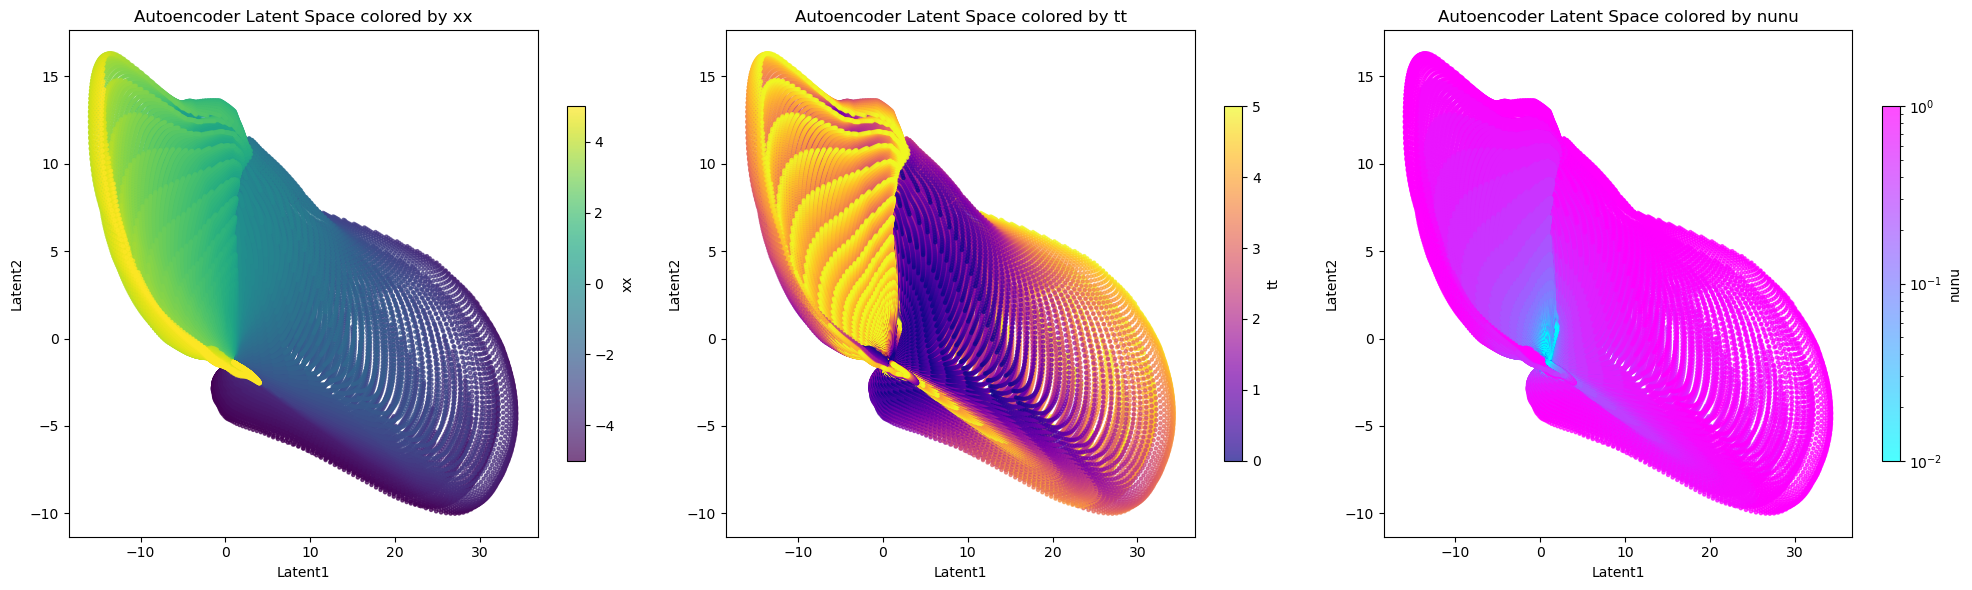

In [16]:
from sklearn.decomposition import PCA
# Use CPU-based UMAP
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import torch

data = np.load('../data_latent.npy')
H = data[:,:,:,3::]
xx =  data[:,:,:,0].reshape(-1,1)
tt =  data[:,:,:,1].reshape(-1,1)
nunu =  data[:,:,:,2].reshape(-1,1)

import torch.nn as nn
import torch.optim as optim

# Prepare data: flatten H to 2D (samples, features)
H_reshaped = H.reshape(-1, H.shape[-1])
X = torch.tensor(H_reshaped, dtype=torch.float32)

# Define autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

input_dim = X.shape[1]
latent_dim = 2
model = Autoencoder(input_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
# Add a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.5)

# Train autoencoder and record loss
n_epochs = 100
batch_size = 256
loss_history = []
for epoch in range(n_epochs):
    perm = torch.randperm(X.size(0))
    epoch_loss = 0.0
    num_batches = 0
    for i in range(0, X.size(0), batch_size):
        idx = perm[i:i+batch_size]
        batch = X[idx]
        optimizer.zero_grad()
        output = model(batch)
        loss = criterion(output, batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        num_batches += 1
    scheduler.step()
    avg_loss = epoch_loss / num_batches
    loss_history.append(avg_loss)
    if (epoch+1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.6f}, LR: {scheduler.get_last_lr()[0]:.6f}")

# Plot loss history
plt.figure(figsize=(7, 4))
plt.plot(loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.grid(True)
plt.show()

# Get latent representations
with torch.no_grad():
    H_latent = model.encoder(X).numpy()

# Visualize latent space colored by xx, tt, nunu (use full data)
import matplotlib.colors as mcolors

color_vars = [
    ('xx', xx, 'viridis', None),
    ('tt', tt, 'plasma', None),
    ('nunu', nunu, 'cool', mcolors.LogNorm(vmin=np.min(nunu[nunu > 0]), vmax=np.max(nunu)))
]

fig = plt.figure(figsize=(20, 6))
for i, (label, color_data, cmap, norm) in enumerate(color_vars):
    ax = fig.add_subplot(1, 3, i+1)
    sc = ax.scatter(H_latent[:, 0], H_latent[:, 1], c=color_data.flatten(), cmap=cmap, norm=norm, s=5, alpha=0.7)
    ax.set_xlabel('Latent1')
    ax.set_ylabel('Latent2')
    ax.set_title(f'Autoencoder Latent Space colored by {label}')
    cbar = fig.colorbar(sc, ax=ax, shrink=0.7)
    cbar.set_label(label)

plt.tight_layout()
# Save fig in pdf #
plt.savefig('autoencoder2D_2d_plots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('autoencoder2D_2d_plots.png', format='png', bbox_inches='tight')
plt.show()


# Compute the Pearson Correlation matrix of the latent space 

Mean value:  0.7393408753965744


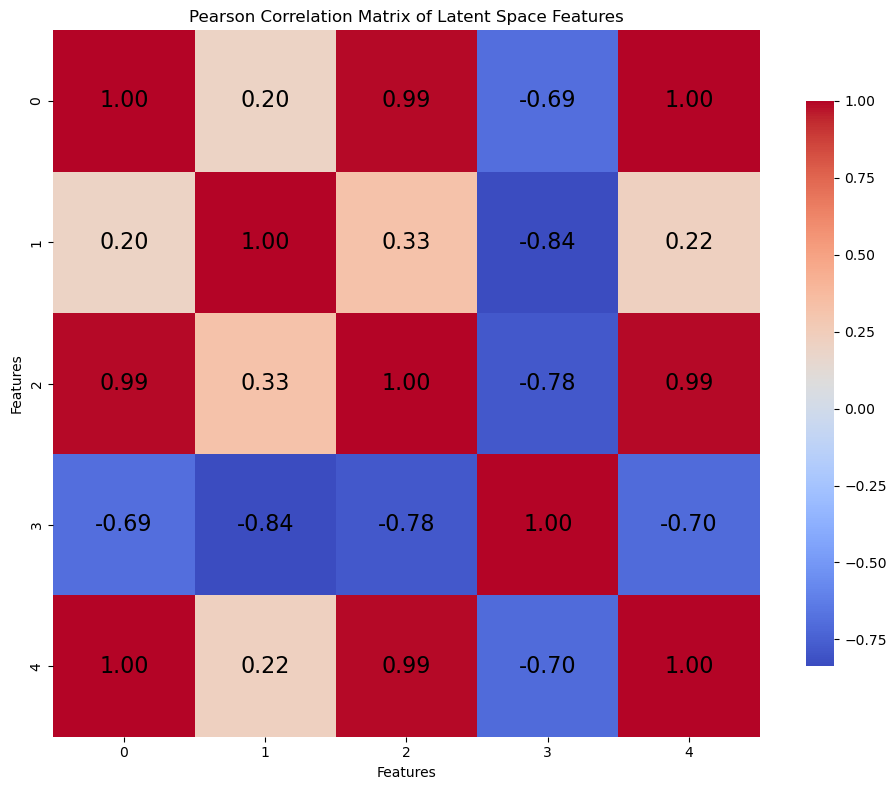

In [17]:
# Load the latent space data
data = np.load('../data_latent.npy')
H = data[:,:,:,3::]
xx =  data[:,:,:,0]
tt =  data[:,:,:,1]
nunu =  data[:,:,:,2]

# Compute the pearson correlation matrix and plot it
corr_matrix = np.corrcoef(H.reshape(-1, H.shape[-1]), rowvar=False)
mean_corr = np.mean(np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]))
print('Mean value: ', str(np.mean(abs(corr_matrix))))
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
    cbar_kws={"shrink": .8}, annot_kws={"size": 16, "color": "black"}
)
plt.title('Pearson Correlation Matrix of Latent Space Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()
# Savefig in pdf #
plt.savefig('pearson_correlation_matrix.pdf', format='pdf', bbox_inches='tight')
plt.show()